In [31]:
import sklearn
from sklearn import cluster
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community

In [63]:
co_matrix = pd.read_csv('co_occurence.csv', index_col = 0)

In [67]:
co_matrix.shape

(999, 999)

In [65]:
co_matrix = co_matrix.loc[co_matrix.index.dropna()]

In [66]:
del co_matrix['Unnamed: 735']

In [68]:
total_pars = 21143
for i in co_matrix.columns: 
    colsum = co_matrix[i].sum()
    for j, r in co_matrix.iterrows():
        cosum = co_matrix[j].sum()
        a = np.log((r/total_pars) / (colsum/total_pars)*(cosum/total_pars)+1)
        co_matrix[i] = a

In [36]:
co_matrix.head()

mr speaker  the congress  fellow citizen    the nation  \
mr speaker        0.000000  4.351814e-10    1.679964e-08  6.325014e-10   
the congress      0.003309  3.795046e-05    1.923899e-10  7.243317e-12   
fellow citizen    0.000000  0.000000e+00    0.000000e+00  2.796114e-10   
the nation        0.000000  0.000000e+00    0.000000e+00  0.000000e+00   
selfgovernment    0.000000  0.000000e+00    0.000000e+00  0.000000e+00   

                selfgovernment  the preservation       liberty      the hand  \
mr speaker        3.413290e-09      3.332977e-09  2.443225e-09  2.342228e-09   
the congress      3.908895e-11      3.816925e-11  2.797984e-11  2.682321e-11   
fellow citizen    1.508922e-09      1.473418e-09  1.080083e-09  1.035435e-09   
the nation        5.681278e-11      5.547607e-11  4.066636e-11  3.898548e-11   
selfgovernment    0.000000e+00      2.993739e-10  2.194549e-10  2.103830e-10   

                the american people    our friend       ...        \
mr speaker             1.933210e-09  1.569942e-08       ...         
the congress           2.213918e-11  1.797900e-10       ...         
fellow citizen         8.546190e-10  6.940281e-09       ...         
the nation             3.217737e-11  2.613103e-10       ...         
selfgovernment         1.736442e-10  1.410149e-09       ...         

                      africa    the threat  the united nation          drug  \
mr speaker      4.627073e-09  9.769072e-09       1.131156e-08  2.010538e-08   
the congress    5.298939e-11  1.118756e-10       1.295402e-10  2.302472e-10   
fellow citizen  2.045502e-09  4.318639e-09       5.000529e-09  8.888037e-09   
the nation      7.701573e-11  1.626022e-10       1.882761e-10  3.346456e-10   
selfgovernment  4.156120e-10  8.774754e-10       1.016024e-09  1.805901e-09   

                        iran        terror     terrorist          iraq  \
mr speaker      4.536149e-09  8.244270e-09  8.211684e-09  5.083742e-09   
the congress    5.194800e-11  9.441359e-11  9.404033e-11  5.821921e-11   
fellow citizen  2.005307e-09  3.644566e-09  3.630160e-09  2.247383e-09   
the nation      7.550227e-11  1.372225e-10  1.366800e-10  8.461676e-11   
selfgovernment  4.074450e-10  7.405150e-10  7.375880e-10  4.566307e-10   

                billion dollar  million dollar  
mr speaker        1.602228e-08             0.0  
the congress      1.834874e-10             0.0  
fellow citizen    7.083011e-09             0.0  
the nation        2.666842e-10             0.0  
selfgovernment    1.439150e-09             0.0  

[5 rows x 1000 columns]

In [15]:
sim = pd.DataFrame(cosine_similarity(co_matrix), index=co_matrix.columns, columns = co_matrix.columns)
sim.head()

mr speaker  the congress  fellow citizen  the nation  \
mr speaker        1.000000      0.161131        0.064550    0.073492   
the congress      0.161131      1.000000        0.290412    0.687892   
fellow citizen    0.064550      0.290412        1.000000    0.366116   
the nation        0.073492      0.687892        0.366116    1.000000   
selfgovernment    0.102923      0.388915        0.223227    0.462029   

                selfgovernment  the preservation   liberty  the hand  \
mr speaker            0.102923          0.036886  0.079030  0.056877   
the congress          0.388915          0.457060  0.405661  0.585388   
fellow citizen        0.223227          0.257143  0.357093  0.287837   
the nation            0.462029          0.627947  0.509968  0.656407   
selfgovernment        1.000000          0.287007  0.466348  0.338125   

                the american people    our friend       ...          africa  \
mr speaker                 0.210665  8.615768e-14       ...        0.033170   
the congress               0.511323  1.351354e-01       ...        0.200514   
fellow citizen             0.300763  8.316026e-02       ...        0.205547   
the nation                 0.537000  2.266765e-01       ...        0.267671   
selfgovernment             0.563230  4.428758e-01       ...        0.264013   

                the threat  the united nation      drug      iran    terror  \
mr speaker        0.000000           0.052705  0.000000  0.000000  0.015069   
the congress      0.144406           0.147867  0.176518  0.092124  0.100740   
fellow citizen    0.048454           0.054433  0.099900  0.059148  0.062252   
the nation        0.168746           0.169061  0.177300  0.126053  0.144357   
selfgovernment    0.527082           0.279906  0.136989  0.432478  0.468999   

                terrorist      iraq  billion dollar  million dollar  
mr speaker       0.026774  0.039825    2.229674e-09    1.110742e-10  
the congress     0.077316  0.127083    2.466877e-01    2.625969e-01  
fellow citizen   0.051848  0.077121    4.271204e-02    6.374328e-02  
the nation       0.128709  0.201779    1.601897e-01    2.089460e-01  
selfgovernment   0.489407  0.473018    4.086215e-02    8.018070e-02  

[5 rows x 999 columns]

['mr speaker', 'the congress', 'fellow citizen', 'the nation', 'selfgovernment', 'the preservation', 'liberty', 'the hand', 'the american people', 'our friend', 'a matter', 'the free world', 'aggression', 'a nation', 'arm', 'a country', 'us', 'peace', 'the price', 'strength', 'the burden', 'freedom', 'this chamber', 'washington', 'this congress', 'this administration', 'america', 'prosperity', 'our nation', 'the world', 'the blessing', 'our child', 'humanity', 'my duty', 'the progress', 'our relation', 'other nation', 'the foundation', 'the face', 'the people', 'million', 'their child', 'the union', 'the situation', 'this time', 'a series', 'unemployment', 'inflation', 'percent', 'construction', 'thing', 'place', 'the past', 'a reduction', 'the rate', 'increase', 'the economy', 'job', 'the month', 'december', 'all american', 'tax', 'history', 'change', 'the increase', 'the beginning', 'the expense', 'year', 'power', 'resource', 'the growth', 'the cost', 'waste', 'fraud', 'government', 

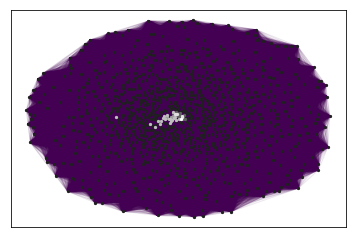

In [69]:
# establish graph
graph = nx.Graph(co_matrix)

edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

#first compute the best partition
#partition = community.best_partition(graph)

# first calculate k-means unsupervised
kmeans = cluster.KMeans(n_clusters = 8).fit(co_matrix)
co_matrix['scores'] = kmeans.labels_
partition = co_matrix['scores'].to_dict()

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
count = 0.
for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    print(list_nodes)
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 5,
                                node_color = str(count / size))

nx.draw_networkx_edges(graph, pos, alpha=0.1, edge_color = weights)
#nx.draw_networkx_labels(graph, pos, font_size = 4, alpha = 0.6)
#plt.figure(figsize=(100,100))
plt.savefig("testgraph.png", dpi=500)

In [19]:
for u, v, weight in graph.edges.data('weight'):
    if weight > 0.39:
        print(u, v)

mr speaker mr speaker
the congress the congress
the congress the nation
the congress the preservation
the congress liberty
the congress the hand
the congress the american people
the congress a matter
the congress a nation
the congress arm
the congress us
the congress peace
the congress the price
the congress the burden
the congress washington
the congress this administration
the congress prosperity
the congress the world
the congress humanity
the congress my duty
the congress the progress
the congress our relation
the congress other nation
the congress the foundation
the congress the people
the congress the state
the congress the union
the congress the situation
the congress this time
the congress construction
the congress thing
the congress place
the congress the past
the congress a reduction
the congress the rate
the congress increase
the congress the economy
the congress december
the congress tax
the congress change
the congress the beginning
the congress the expense
the congress ye

the nation the matter
the nation preparation
the nation use
the nation consequence
the nation china
the nation accordance
the nation the representative
the nation the meantime
the nation a copy
the nation the prosperity
the nation july
the nation the war
the nation life
the nation happiness
the nation a measure
the nation the limit
the nation the army
the nation efficiency
the nation their duty
the nation hostility
the nation individual
the nation the circumstance
the nation the man
the nation the bill
the nation the measure
the nation the relation
the nation provision
the nation death
the nation the navy
the nation attention
the nation the appropriation
the nation the purchase
the nation territory
the nation population
the nation the efficiency
the nation our navy
the nation the service
the nation the officer
the nation the head
the nation officer
the nation some time
the nation the development
the nation necessity
the nation danger
the nation advance
the nation the revenue
the nation

the preservation a war
the preservation a government
the preservation defense
the preservation navy
the preservation information
the preservation the executive
the preservation the court
the preservation the act
the preservation the construction
the preservation authority
the preservation the effect
the preservation the control
the preservation the recommendation
the preservation that time
the preservation the bureau
the preservation a right
the preservation measure
the preservation a condition
the preservation a state
the preservation the danger
the preservation the safety
the preservation case
the preservation the affair
the preservation the importance
the preservation the success
the preservation new york
the preservation the cause
the preservation that purpose
the preservation pursuance
the preservation the execution
the preservation the authority
the preservation our commerce
the preservation improvement
the preservation the improvement
the preservation the administration
the pres

the hand information
the hand the executive
the hand the decision
the hand the court
the hand the act
the hand the capital
the hand loss
the hand the construction
the hand price
the hand the suggestion
the hand the term
the hand authority
the hand force
the hand a number
the hand number
the hand sale
the hand amount
the hand violation
the hand the settlement
the hand the proceeding
the hand the effect
the hand the control
the hand the accomplishment
the hand january
the hand the confidence
the hand the sale
the hand this act
the hand the recommendation
the hand that time
the hand the bureau
the hand section
the hand bond
the hand charge
the hand the currency
the hand a right
the hand france
the hand claim
the hand the claimant
the hand the date
the hand this question
the hand the two country
the hand the agent
the hand many year
the hand commissioner
the hand measure
the hand the requirement
the hand a condition
the hand the th
the hand march
the hand the absence
the hand any time
the 

a matter the amount
a matter the character
a matter your attention
a matter labor
a matter the form
a matter the conduct
a matter harmony
a matter addition
a matter wisdom
a matter a part
a matter question
a matter the creation
a matter the united state
a matter the ground
a matter return
a matter the benefit
a matter the adoption
a matter great britain
a matter war
a matter difficulty
a matter the last session
a matter the history
a matter the work
a matter regard
a matter circumstance
a matter term
a matter an opportunity
a matter the matter
a matter use
a matter consequence
a matter accordance
a matter the representative
a matter the meantime
a matter the prosperity
a matter the war
a matter life
a matter happiness
a matter the limit
a matter efficiency
a matter individual
a matter the circumstance
a matter the bill
a matter the measure
a matter the relation
a matter provision
a matter attention
a matter territory
a matter population
a matter the service
a matter the officer
a matte

arm a measure
arm the limit
arm the army
arm our army
arm hostility
arm the measure
arm the relation
arm provision
arm the navy
arm attention
arm territory
arm our navy
arm the service
arm the officer
arm officer
arm some time
arm necessity
arm danger
arm advance
arm the fact
arm the territory
arm the establishment
arm the want
arm the continuance
arm person
arm the maintenance
arm the republic
arm louisiana
arm texas
arm reference
arm the property
arm the period
arm the part
arm character
arm intelligence
arm reason
arm the sea
arm the port
arm mean
arm the resource
arm our trade
arm a question
arm the field
arm the difficulty
arm the attention
arm sea
arm the provision
arm their government
arm the task
arm none
arm a spirit
arm nation
arm occasion
arm our government
arm a war
arm friendship
arm a government
arm amity
arm defense
arm navy
arm information
arm the executive
arm the decision
arm the court
arm the act
arm loss
arm the term
arm the party
arm authority
arm force
arm a numbe

us the plan
us this continent
us reference
us the city
us the life
us the position
us the extension
us the restoration
us the property
us the period
us the part
us fear
us the public interest
us the future
us character
us intelligence
us the legislation
us everything
us reason
us the sea
us opportunity
us mean
us the resource
us delay
us such measure
us the source
us the trade
us industry
us development
us a question
us the field
us the difficulty
us the attention
us sea
us the provision
us appropriation
us economy
us the money
us purpose
us their government
us expense
us the task
us policy
us none
us a spirit
us the opportunity
us nation
us their life
us occasion
us our government
us a war
us a government
us defense
us navy
us our policy
us all time
us the commerce
us information
us the executive
us the decision
us the court
us the act
us the capital
us loss
us the construction
us price
us the term
us contract
us authority
us force
us a number
us number
us sale
us amount
us violation


peace the cause
peace italy
peace turkey
peace these claim
peace that purpose
peace the th day
peace an appropriation
peace germany
peace pursuance
peace the execution
peace the emperor
peace russia
peace the minister
peace this treaty
peace that republic
peace the adjustment
peace february
peace the obligation
peace the authority
peace other power
peace those country
peace behalf
peace our commerce
peace cause
peace member
peace improvement
peace no doubt
peace the administration
peace a duty
peace relief
peace the close
peace the population
peace care
peace the person
peace the management
peace the independence
peace my predecessor
peace the fund
peace the order
peace the reason
peace the practice
peace that government
peace the legislature
peace citizen
peace the opinion
peace the river
peace confidence
peace the mississippi
peace the industry
peace the last congress
peace the appointment
peace step
peace the change
peace vessel
peace the present session
peace the occasion
peace the

freedom the individual
freedom responsibility
freedom the consequence
freedom its people
freedom the cause
freedom our enemy
freedom their country
freedom this war
freedom friend
freedom conflict
freedom our power
freedom the institution
freedom courage
freedom community
freedom the freedom
freedom our ally
freedom the family
freedom a world
freedom the chance
freedom citizenship
freedom parent
freedom democracy
freedom the threat
freedom the united nation
freedom iran
freedom terror
freedom terrorist
freedom iraq
this chamber this chamber
this chamber this congress
this chamber america
this chamber our nation
this chamber the world
this chamber job
this chamber american
this chamber no one
this chamber the program
this chamber progress
this chamber our economy
this chamber people
this chamber every american
this chamber something
this chamber school
this chamber the challenge
this chamber reform
this chamber faith
this chamber woman
this chamber the globe
this chamber afghanistan
this

washington opinion
washington our union
washington the nature
washington right
washington the security
washington our constitution
washington satisfaction
washington redress
washington favor
washington their right
washington the general government
washington act
washington conflict
washington the honor
washington a source
washington denmark
washington the claim
washington portugal
washington spain
washington brazil
washington relation
washington complaint
washington the correspondence
washington event
washington a treaty
washington the manner
washington the proposition
washington this respect
washington the object
washington our fellow citizen
washington our shore
washington south america
washington the king
washington our minister
washington its citizen
washington canada
washington difference
washington paris
washington the spanish government
washington the vessel
washington the satisfaction
washington an end
washington indemnity
washington abuse
washington those state
washington the 

prosperity the market
prosperity the value
prosperity the continuance
prosperity this policy
prosperity the operation
prosperity person
prosperity the maintenance
prosperity the plan
prosperity reference
prosperity the life
prosperity the restoration
prosperity the period
prosperity the part
prosperity fear
prosperity the public interest
prosperity the future
prosperity intelligence
prosperity everything
prosperity reason
prosperity opportunity
prosperity mean
prosperity the resource
prosperity such measure
prosperity industry
prosperity the difficulty
prosperity this session
prosperity the attention
prosperity the provision
prosperity economy
prosperity purpose
prosperity their government
prosperity expense
prosperity policy
prosperity none
prosperity a spirit
prosperity the opportunity
prosperity nation
prosperity their life
prosperity our government
prosperity a government
prosperity defense
prosperity navy
prosperity all time
prosperity the executive
prosperity the act
prosperity t

humanity the convention
humanity war
humanity mexico
humanity the last session
humanity regard
humanity circumstance
humanity importance
humanity term
humanity the matter
humanity accordance
humanity the meantime
humanity a copy
humanity the war
humanity life
humanity a measure
humanity the limit
humanity our army
humanity hostility
humanity the circumstance
humanity the measure
humanity the relation
humanity death
humanity attention
humanity territory
humanity our navy
humanity the officer
humanity some time
humanity necessity
humanity danger
humanity the fact
humanity the territory
humanity the action
humanity the establishment
humanity the want
humanity country
humanity the continuance
humanity person
humanity the republic
humanity louisiana
humanity texas
humanity the city
humanity the life
humanity the position
humanity the property
humanity the part
humanity the future
humanity character
humanity reason
humanity the sea
humanity the port
humanity the resource
humanity our trade
h

my duty our minister
my duty its citizen
my duty canada
my duty difference
my duty your consideration
my duty the vessel
my duty the satisfaction
my duty no reason
my duty an end
my duty indemnity
my duty abuse
my duty demand
my duty the article
my duty the justice
my duty the st day
my duty england
my duty profit
my duty the rebellion
my duty the destruction
the progress the progress
the progress other nation
the progress the people
the progress the state
the progress the union
the progress this time
the progress thing
the progress place
the progress the past
the progress the month
the progress the beginning
the progress the expense
the progress year
the progress power
the progress resource
the progress government
the progress thousand
the progress no one
the progress the way
the progress day
the progress the course
the progress the product
the progress the policy
the progress office
the progress law
the progress progress
the progress time
the progress our history
the progress people


other nation the ship
other nation the officer
other nation officer
other nation some time
other nation necessity
other nation danger
other nation advance
other nation the fact
other nation the territory
other nation the action
other nation the establishment
other nation the want
other nation the value
other nation country
other nation the continuance
other nation this policy
other nation the acquisition
other nation person
other nation the maintenance
other nation the republic
other nation louisiana
other nation texas
other nation the production
other nation this continent
other nation reference
other nation the city
other nation the life
other nation the position
other nation the restoration
other nation the property
other nation the period
other nation the part
other nation fear
other nation the public interest
other nation the future
other nation character
other nation intelligence
other nation reason
other nation the sea
other nation the port
other nation mean
other nation the res

million detail
million order
million the year
million condition
million security
million a time
million the end
million congress
million the president
million a period
million the condition
million the present
million my opinion
million money
million the public
million the result
million connection
million this subject
million the consideration
million a view
million the passage
million a law
million its provision
million its operation
million the necessity
million the purpose
million the reduction
million the tariff
million the country
million effect
million the wisdom
million consideration
million the interest
million interest
million duty
million the application
million view
million the executive department
million the duty
million bank
million the issue
million the use
million the amount
million circulation
million your attention
million the form
million addition
million a part
million may
million the adoption
million the secretary
million the last session
million an opportunity
mi

the state the development
the state necessity
the state danger
the state advance
the state the revenue
the state the business
the state an increase
the state the fact
the state cent
the state november
the state the territory
the state the action
the state the establishment
the state the want
the state the market
the state the value
the state country
the state the continuance
the state this policy
the state agriculture
the state the acquisition
the state settlement
the state the west
the state the operation
the state person
the state the maintenance
the state land
the state the commission
the state the indian
the state the member
the state the republic
the state louisiana
the state texas
the state the production
the state the plan
the state columbia
the state reference
the state the city
the state the position
the state the extension
the state the restoration
the state the property
the state the period
the state the report
the state the session
the state the part
the state the public in

the situation the question
the situation the experience
the situation property
the situation the exercise
the situation the name
the situation the contrary
the situation the effort
the situation way
the situation money
the situation the place
the situation the result
the situation the other hand
the situation connection
the situation the power
the situation commerce
the situation this subject
the situation the consideration
the situation a view
the situation the passage
the situation the necessity
the situation the purpose
the situation this purpose
the situation the direction
the situation the reduction
the situation the country
the situation effect
the situation the wisdom
the situation consideration
the situation the subject
the situation the interest
the situation principle
the situation a system
the situation the principle
the situation interest
the situation duty
the situation protection
the situation advantage
the situation the application
the situation view
the situation the ex

this time trade
this time a policy
this time good faith
this time action
this time the force
this time the event
this time support
this time negotiation
this time the protection
this time europe
this time other country
this time condition
this time the difference
this time security
this time the rule
this time our people
this time the kind
this time a time
this time this nation
this time course
this time the end
this time men
this time the philippine
this time the spirit
this time the water
this time honor
this time congress
this time the president
this time a period
this time the condition
this time success
this time the men
this time the present
this time home
this time the day
this time this government
this time this country
this time the community
this time the evil
this time my message
this time the question
this time the regulation
this time trust
this time my opinion
this time property
this time the exercise
this time the name
this time experience
this time the contrary
this tim

thing character
thing reason
thing the sea
thing the port
thing mean
thing the resource
thing delay
thing such measure
thing industry
thing our trade
thing a question
thing the difficulty
thing the attention
thing sea
thing the provision
thing economy
thing purpose
thing their government
thing expense
thing the task
thing policy
thing none
thing a spirit
thing nation
thing occasion
thing our government
thing a war
thing friendship
thing a government
thing amity
thing defense
thing navy
thing all time
thing the commerce
thing the opening
thing information
thing the executive
thing the decision
thing the court
thing the act
thing loss
thing the construction
thing price
thing the suggestion
thing the term
thing contract
thing the party
thing authority
thing force
thing a number
thing number
thing amount
thing violation
thing the settlement
thing method
thing the proceeding
thing the effect
thing the control
thing the accomplishment
thing mind
thing the confidence
thing discussion
thing th

place foreigner
place term
place several year
place an opportunity
place the matter
place preparation
place use
place consequence
place china
place accordance
place the representative
place the meantime
place a copy
place the prosperity
place july
place the war
place life
place happiness
place a measure
place the limit
place the army
place efficiency
place their duty
place hostility
place individual
place the circumstance
place the bill
place the measure
place the relation
place provision
place death
place the navy
place attention
place the purchase
place territory
place population
place the ship
place the service
place the officer
place officer
place some time
place the development
place necessity
place danger
place the revenue
place the business
place the fact
place cent
place november
place the territory
place the action
place the establishment
place the want
place the market
place the value
place country
place the continuance
place this policy
place the acquisition
place the west
p

the past the interest
the past principle
the past a system
the past the principle
the past the soil
the past the standard
the past advantage
the past the application
the past view
the past the executive department
the past fact
the past the case
the past the duty
the past the need
the past the use
the past the character
the past labor
the past the form
the past the conduct
the past harmony
the past addition
the past wisdom
the past a part
the past the united state
the past the ground
the past the benefit
the past the adoption
the past war
the past the welfare
the past the work
the past regard
the past circumstance
the past term
the past an opportunity
the past the matter
the past consequence
the past accordance
the past the representative
the past the meantime
the past the war
the past life
the past efficiency
the past individual
the past the man
the past the measure
the past the relation
the past the officer
the past officer
the past some time
the past the development
the past danger


the rate connection
the rate the power
the rate practice
the rate commerce
the rate this subject
the rate the consideration
the rate a view
the rate the passage
the rate its provision
the rate its operation
the rate the necessity
the rate the purpose
the rate the reduction
the rate the tariff
the rate the country
the rate manufacture
the rate effect
the rate the advantage
the rate the wisdom
the rate this system
the rate the subject
the rate the interest
the rate a system
the rate interest
the rate duty
the rate the application
the rate view
the rate the case
the rate the duty
the rate my judgment
the rate bank
the rate the issue
the rate the view
the rate the use
the rate the amount
the rate circulation
the rate your attention
the rate the form
the rate addition
the rate good
the rate the benefit
the rate the adoption
the rate the secretary
the rate the last session
the rate regard
the rate administration
the rate several year
the rate an opportunity
the rate use
the rate consequence


job american
job no one
job the program
job investment
job our economy
job hope
job people
job education
job business
job every american
job program
job something
job school
job welfare
job family
job faith
job woman
job god
job home
job this country
job our country
job wage
job access
job life
job company
job the life
job opportunity
job everyone
job work
job farmer
job my administration
job poverty
job worker
job child
job community
job college
job the chance
job the job
job parent
job health care
job the st century
job small business
the month the month
the month december
the month the expense
the month year
the month power
the month government
the month the course
the month the policy
the month a change
the month law
the month time
the month the government
the month the number
the month the department
the month the last year
the month nothing
the month the time
the month august
the month the same time
the month others
the month the law
the month operation
the month our citizen
the 

december the debt
december debt
december the estimate
december the expenditure
december the credit
december the bond
december the treasury department
december the come year
december the discharge
december the person
december the management
december the independence
december my predecessor
december the fund
december the st
december the order
december the reason
december that government
december citizen
december the opinion
december the river
december the loss
december the last congress
december the appointment
december the change
december vessel
december the present session
december that quarter
december the whole
december loan
december the same period
december the demand
december the remainder
december all nation
december peru
december a portion
december an act
december execution
december the commissioner
december florida
december the public service
december affair
december every part
december result
december the inhabitant
december the failure
december the existence
december the natur

the increase the estimate
the increase that department
the increase the expenditure
the increase the surplus
the increase the treasury
the increase the opinion
the increase mile
the increase the change
the increase the whole
the increase the same period
the increase the public service
the increase the postmastergeneral
the increase the next fiscal year
the increase the whole country
the increase exist law
the increase the mail
the increase the previous year
the increase the support
the increase receipt
the increase the current year
the increase the current fiscal year
the increase our population
the beginning the beginning
the beginning the expense
the beginning year
the beginning power
the beginning government
the beginning the way
the beginning this year
the beginning the course
the beginning the policy
the beginning office
the beginning a change
the beginning law
the beginning progress
the beginning the deficit
the beginning time
the beginning revenue
the beginning the government
th

the expense addition
the expense a part
the expense the creation
the expense may
the expense the united state
the expense the ground
the expense return
the expense the benefit
the expense the adoption
the expense the secretary
the expense war
the expense difficulty
the expense mexico
the expense the last session
the expense the work
the expense regard
the expense administration
the expense circumstance
the expense importance
the expense term
the expense several year
the expense an opportunity
the expense the matter
the expense use
the expense consequence
the expense china
the expense accordance
the expense the representative
the expense the meantime
the expense the prosperity
the expense july
the expense the war
the expense life
the expense a measure
the expense the limit
the expense the army
the expense efficiency
the expense their duty
the expense our army
the expense individual
the expense the circumstance
the expense the bill
the expense the measure
the expense the relation
the exp

year a number
year sale
year amount
year violation
year the settlement
year the effect
year cooperation
year the control
year the accomplishment
year january
year the sale
year the recommendation
year that time
year the bureau
year section
year bond
year charge
year a right
year the individual
year this work
year claim
year the agent
year many year
year measure
year the requirement
year a condition
year the th
year march
year the absence
year any time
year the hope
year a result
year a state
year the danger
year responsibility
year the responsibility
year american citizen
year anything
year case
year injury
year the affair
year the importance
year custom
year the success
year the conclusion
year treaty
year my last annual message
year an agreement
year the privilege
year the sum
year september
year the cause
year june
year the present year
year that purpose
year the th day
year article
year an appropriation
year pursuance
year the execution
year the loan
year february
year the obligati

power the affair
power the suppression
power the importance
power the exchange
power the success
power the conclusion
power treaty
power my last annual message
power the privilege
power september
power its people
power new york
power the treaty
power the cause
power that purpose
power the th day
power the approval
power an appropriation
power germany
power pursuance
power the execution
power russia
power the minister
power february
power the obligation
power the authority
power other power
power foreign country
power behalf
power our commerce
power cause
power member
power improvement
power no doubt
power the improvement
power the administration
power the basis
power a duty
power relief
power value
power the light
power the close
power the payment
power debt
power the population
power the credit
power the treasury department
power the discharge
power care
power the person
power a plan
power the management
power the bank
power the independence
power my predecessor
power the fund
power t

fraud the legislation
fraud reason
fraud mean
fraud the source
fraud the attention
fraud the provision
fraud expense
fraud policy
fraud information
fraud the supreme court
fraud the court
fraud the act
fraud sale
fraud the proceeding
fraud the effect
fraud the sale
fraud the recommendation
fraud this question
fraud the requirement
fraud the th
fraud case
fraud the importance
fraud my last annual message
fraud the privilege
fraud september
fraud the th day
fraud the execution
fraud february
fraud foreign country
fraud the administration
fraud care
fraud the person
fraud the management
fraud my recommendation
fraud the practice
fraud naturalization
fraud citizen
fraud the opinion
fraud the interior
fraud our institution
fraud an act
fraud the public service
fraud opinion
fraud exist law
fraud favor
fraud taxation
fraud the general government
fraud a source
fraud relation
fraud the support
fraud the ability
fraud benefit
fraud the article
fraud citizenship
government government
government

government satisfaction
government redress
government payment
government the commencement
government the tax
government the whole country
government failure
government favor
government taxation
government import
government these measure
government my administration
government the election
government their right
government the general government
government injustice
government act
government conflict
government the honor
government a source
government the claim
government spain
government brazil
government relation
government complaint
government the correspondence
government event
government the prospect
government a treaty
government the manner
government the proposition
government the support
government this respect
government the object
government the institution
government the removal
government our fellow citizen
government the ability
government our shore
government benefit
government a way
government living
government recommendation
government good will
government this matter
go

the way the interest
the way principle
the way a system
the way the principle
the way the soil
the way wage
the way protection
the way advantage
the way view
the way fact
the way the case
the way the duty
the way competition
the way my judgment
the way the need
the way the use
the way the character
the way your attention
the way labor
the way the form
the way addition
the way a part
the way the creation
the way the united state
the way return
the way the benefit
the way the adoption
the way war
the way difficulty
the way the history
the way mankind
the way the work
the way regard
the way administration
the way an opportunity
the way the matter
the way use
the way consequence
the way accordance
the way the representative
the way the meantime
the way the war
the way life
the way happiness
the way individual
the way the man
the way the measure
the way provision
the way death
the way attention
the way population
the way the officer
the way some time
the way the development
the way necessit

the course the will
the course your attention
the course the point
the course labor
the course the form
the course the conduct
the course harmony
the course addition
the course wisdom
the course a part
the course conformity
the course question
the course the creation
the course cuba
the course may
the course the united state
the course the island
the course the ground
the course return
the course the benefit
the course independence
the course the adoption
the course a convention
the course great britain
the course ratification
the course the convention
the course the secretary
the course war
the course arbitration
the course difficulty
the course mexico
the course the last session
the course the history
the course the work
the course regard
the course circumstance
the course importance
the course foreigner
the course term
the course several year
the course an opportunity
the course the matter
the course preparation
the course use
the course consequence
the course china
the course accor

the moment the two country
the moment many year
the moment the two government
the moment measure
the moment a condition
the moment the th
the moment march
the moment the absence
the moment the hope
the moment supply
the moment the danger
the moment assurance
the moment the responsibility
the moment the safety
the moment anything
the moment the consequence
the moment injury
the moment the importance
the moment the exchange
the moment the success
the moment the conclusion
the moment treaty
the moment my last annual message
the moment an agreement
the moment new york
the moment the treaty
the moment the cause
the moment that purpose
the moment the th day
the moment an appropriation
the moment pursuance
the moment russia
the moment february
the moment the obligation
the moment the authority
the moment foreign country
the moment behalf
the moment our commerce
the moment cause
the moment no doubt
the moment the basis
the moment relief
the moment value
the moment the light
the moment the clos

the policy the several state
the policy regulation
the policy this subject
the policy the consideration
the policy a view
the policy the passage
the policy a law
the policy its provision
the policy its operation
the policy the necessity
the policy the purpose
the policy the enforcement
the policy this purpose
the policy the direction
the policy the reduction
the policy the tariff
the policy the country
the policy manufacture
the policy effect
the policy the advantage
the policy this end
the policy stability
the policy the wisdom
the policy consideration
the policy the subject
the policy the interest
the policy principle
the policy a system
the policy the principle
the policy the performance
the policy interest
the policy duty
the policy the soil
the policy protection
the policy advantage
the policy the application
the policy view
the policy the executive department
the policy fact
the policy a commission
the policy the case
the policy the duty
the policy my judgment
the policy the need

office the condition
office success
office the men
office the present
office home
office the day
office this government
office this country
office the community
office a whole
office my message
office the question
office the regulation
office trust
office my opinion
office the exercise
office corporation
office experience
office the contrary
office the effort
office wealth
office money
office the public
office the place
office our country
office the result
office connection
office the power
office the constitution
office practice
office commerce
office regulation
office this subject
office the consideration
office a view
office the passage
office a law
office its provision
office the necessity
office the purpose
office the enforcement
office this purpose
office the direction
office the reduction
office the tariff
office the country
office effect
office the advantage
office this end
office the wisdom
office consideration
office the subject
office the interest
office principle
office a s

law nothing
law the time
law august
law a bill
law the next year
law the same time
law others
law the law
law operation
law capital
law our system
law our citizen
law aid
law the federal government
law the national government
law the return
law the mean
law part
law transportation
law the extent
law hand
law legislation
law state
law enterprise
law dollar
law service
law the first time
law the land
law crime
law the right
law society
law justice
law the enactment
law the house
law a subject
law detail
law order
law the past year
law respect
law the year
law trade
law the south
law a policy
law good faith
law action
law the force
law the event
law support
law a position
law the protection
law europe
law other country
law condition
law the difference
law security
law our people
law the kind
law a time
law the process
law course
law the end
law men
law the spirit
law safety
law congress
law the president
law representative
law a period
law the condition
law success
law a people
law the pr

progress the commerce
progress information
progress the court
progress the construction
progress force
progress growth
progress a number
progress the effect
progress cooperation
progress the control
progress mind
progress that time
progress equality
progress many year
progress measure
progress a result
progress the danger
progress responsibility
progress the responsibility
progress the consequence
progress case
progress the importance
progress the success
progress treaty
progress my last annual message
progress an agreement
progress the cause
progress agreement
progress that purpose
progress russia
progress the authority
progress behalf
progress our commerce
progress improvement
progress the improvement
progress the administration
progress relief
progress care
progress the problem
progress citizen
progress confidence
progress the industry
progress work
progress their country
progress the demand
progress the earth
progress all nation
progress the citizen
progress our union
progress frie

production the mean
production hand
production legislation
production dollar
production order
production trade
production a policy
production action
production europe
production condition
production the difference
production our people
production a time
production course
production the condition
production home
production this country
production the evil
production the experience
production way
production wealth
production money
production the public
production our country
production the result
production the farmer
production commerce
production the necessity
production the purpose
production the country
production stability
production a system
production the soil
production wage
production view
production the duty
production competition
production the need
production the use
production labor
production good
production the benefit
production an opportunity
production use
production life
production the fact
production cent
production the action
production the market
production the valu

the government man
the government the president
the government a period
the government the condition
the government success
the government a people
the government the present
the government home
the government the day
the government this government
the government this country
the government the community
the government proportion
the government the evil
the government our duty
the government my message
the government length
the government the question
the government the regulation
the government trust
the government the experience
the government my opinion
the government property
the government the exercise
the government the name
the government corporation
the government experience
the government the contrary
the government the effort
the government way
the government wealth
the government money
the government the public
the government the place
the government our country
the government the result
the government the other hand
the government connection
the government the power
the gov

the number measure
the number the requirement
the number the th
the number march
the number a result
the number a state
the number the danger
the number case
the number the suppression
the number the importance
the number the success
the number the privilege
the number the sum
the number september
the number new york
the number june
the number the present year
the number that purpose
the number the th day
the number pursuance
the number the execution
the number february
the number the authority
the number excess
the number our commerce
the number improvement
the number the administration
the number cost
the number the basis
the number relief
the number account
the number the close
the number the last fiscal year
the number a surplus
the number the payment
the number the estimate
the number that department
the number the expenditure
the number the treasury
the number the population
the number the credit
the number the office
the number care
the number the person
the number the war depar

business the nature
business the security
business employment
business silver
business payment
business treasury note
business the commencement
business the tax
business the whole country
business credit
business the public money
business favor
business exchange
business taxation
business import
business these measure
business my administration
business the general government
business injustice
business relation
business the manner
business the support
business this respect
business the object
business the ability
business benefit
business a way
business living
business worker
business child
business this matter
business your consideration
business no reason
business demand
business college
business england
business the chance
business the job
business health care
business profit
our resource our resource
our resource the same time
our resource aid
our resource the federal government
our resource part
our resource detail
our resource the year
our resource the protection
our resource se

the last year the purchase
the last year the efficiency
the last year the service
the last year the head
the last year officer
the last year the revenue
the last year the postoffice department
the last year the business
the last year the receipt
the last year the fiscal year
the last year an increase
the last year the precede year
the last year the fact
the last year cent
the last year november
the last year the establishment
the last year the want
the last year the value
the last year the operation
the last year the maintenance
the last year public land
the last year land
the last year reference
the last year the extension
the last year the period
the last year the report
the last year the public interest
the last year the legislation
the last year reason
the last year market
the last year mean
the last year the resource
the last year the attention
the last year the provision
the last year appropriation
the last year economy
the last year the money
the last year expense
the last year 

nothing protection
nothing advantage
nothing the application
nothing view
nothing the executive department
nothing fact
nothing the case
nothing the duty
nothing competition
nothing my judgment
nothing bank
nothing the need
nothing the issue
nothing the view
nothing the use
nothing the amount
nothing the character
nothing circulation
nothing the will
nothing your attention
nothing the point
nothing labor
nothing the form
nothing the conduct
nothing harmony
nothing addition
nothing wisdom
nothing a part
nothing his country
nothing conformity
nothing question
nothing the organization
nothing the creation
nothing cuba
nothing may
nothing the united state
nothing the island
nothing good
nothing the ground
nothing return
nothing the benefit
nothing independence
nothing the adoption
nothing a convention
nothing great britain
nothing ratification
nothing the convention
nothing the secretary
nothing war
nothing the welfare
nothing arbitration
nothing difficulty
nothing mexico
nothing the last 

the time the relation
the time provision
the time the navy
the time attention
the time the appropriation
the time the purchase
the time territory
the time population
the time the efficiency
the time the service
the time the officer
the time the head
the time officer
the time some time
the time the development
the time necessity
the time danger
the time advance
the time the revenue
the time the business
the time the receipt
the time an increase
the time the fact
the time cent
the time november
the time the territory
the time the action
the time the establishment
the time the want
the time the market
the time the value
the time country
the time the continuance
the time this policy
the time agriculture
the time the acquisition
the time settlement
the time the operation
the time person
the time the maintenance
the time the commission
the time the member
the time the republic
the time louisiana
the time texas
the time the production
the time the plan
the time this continent
the time referen

august a commission
august the case
august the duty
august my judgment
august the need
august the view
august the use
august the amount
august the character
august your attention
august the point
august the form
august the conduct
august harmony
august addition
august a part
august conformity
august question
august the employment
august cuba
august may
august the united state
august the island
august the ground
august return
august the benefit
august independence
august the adoption
august a convention
august great britain
august ratification
august the convention
august the secretary
august war
august arbitration
august difficulty
august mexico
august the last session
august colombia
august the work
august regard
august circumstance
august importance
august foreigner
august term
august an opportunity
august the matter
august use
august consequence
august china
august accordance
august the representative
august the meantime
august a copy
august july
august the war
august a measure
augu

the same time many year
the same time the two government
the same time commissioner
the same time that country
the same time measure
the same time the requirement
the same time a condition
the same time the th
the same time march
the same time the absence
the same time any time
the same time the hope
the same time supply
the same time a result
the same time a state
the same time the danger
the same time assurance
the same time responsibility
the same time communication
the same time april
the same time the responsibility
the same time the safety
the same time american citizen
the same time anything
the same time instruction
the same time both party
the same time the consequence
the same time case
the same time injury
the same time the affair
the same time the suppression
the same time october
the same time the importance
the same time the exchange
the same time custom
the same time the success
the same time the conclusion
the same time treaty
the same time my last annual message
the sa

others some time
others the development
others necessity
others danger
others advance
others the revenue
others the business
others the fact
others cent
others november
others the territory
others the action
others the establishment
others the want
others the market
others the value
others country
others the continuance
others this policy
others instance
others agriculture
others the acquisition
others settlement
others the operation
others person
others the maintenance
others the commission
others the member
others the republic
others louisiana
others texas
others the production
others the plan
others this continent
others columbia
others our territory
others reference
others the city
others the life
others the position
others the extension
others the restoration
others the property
others the period
others the report
others the session
others the part
others the public interest
others the future
others character
others intelligence
others the legislation
others everything
others reas

the law the effort
the law way
the law the line
the law wealth
the law money
the law the public
the law the place
the law our country
the law the result
the law the other hand
the law connection
the law the power
the law the constitution
the law this power
the law practice
the law commerce
the law foreign nation
the law the several state
the law regulation
the law this subject
the law the consideration
the law a view
the law the passage
the law a law
the law its provision
the law its operation
the law the necessity
the law the purpose
the law the enforcement
the law this purpose
the law the direction
the law the reduction
the law the tariff
the law the country
the law manufacture
the law effect
the law the advantage
the law this end
the law stability
the law the wisdom
the law this system
the law consideration
the law the subject
the law the interest
the law principle
the law a system
the law the principle
the law the performance
the law interest
the law duty
the law the soil
the law t

operation the recommendation
operation that time
operation the bureau
operation bond
operation charge
operation the currency
operation a right
operation the date
operation measure
operation a condition
operation the th
operation march
operation the absence
operation any time
operation the danger
operation case
operation the affair
operation the importance
operation custom
operation the success
operation my last annual message
operation the sum
operation september
operation the cause
operation june
operation the present year
operation that purpose
operation the th day
operation an appropriation
operation pursuance
operation the execution
operation the loan
operation february
operation the obligation
operation the authority
operation foreign country
operation excess
operation department
operation improvement
operation no doubt
operation the improvement
operation the administration
operation cost
operation the basis
operation relief
operation account
operation value
operation the close
op

school citizenship
school the job
school parent
school health care
school the st century
school democracy
school the threat
school drug
school terrorist
school iraq
welfare welfare
welfare family
welfare wage
welfare labor
welfare company
welfare opportunity
welfare this work
welfare the problem
welfare employment
welfare my administration
welfare poverty
welfare worker
welfare child
welfare plan
welfare college
welfare parent
welfare health care
jurisdiction jurisdiction
jurisdiction the return
jurisdiction state
jurisdiction the right
jurisdiction justice
jurisdiction respect
jurisdiction good faith
jurisdiction action
jurisdiction the event
jurisdiction negotiation
jurisdiction the protection
jurisdiction other country
jurisdiction the rule
jurisdiction the water
jurisdiction congress
jurisdiction the president
jurisdiction this government
jurisdiction the question
jurisdiction property
jurisdiction the exercise
jurisdiction the name
jurisdiction the result
jurisdiction the other ha

the federal government cost
the federal government the basis
the federal government a duty
the federal government relief
the federal government account
the federal government the light
the federal government the close
the federal government the payment
the federal government the debt
the federal government debt
the federal government the estimate
the federal government that department
the federal government the surplus
the federal government the credit
the federal government the treasury department
the federal government the discharge
the federal government care
the federal government a plan
the federal government the management
the federal government the fund
the federal government the problem
the federal government the reason
the federal government everyone
the federal government the practice
the federal government the legislature
the federal government the opinion
the federal government confidence
the federal government the industry
the federal government the loss
the federal govern

the mean the light
the mean the close
the mean the last fiscal year
the mean the public debt
the mean a surplus
the mean the payment
the mean the debt
the mean debt
the mean the estimate
the mean that department
the mean the expenditure
the mean the surplus
the mean the treasury
the mean the population
the mean the credit
the mean the bond
the mean the treasury department
the mean the come year
the mean the office
the mean the discharge
the mean care
the mean the person
the mean a plan
the mean the management
the mean the bank
the mean all the people
the mean the war department
the mean my predecessor
the mean this plan
the mean my recommendation
the mean the fund
the mean the st
the mean the method
the mean the problem
the mean the reason
the mean everyone
the mean the practice
the mean the legislature
the mean citizen
the mean the opinion
the mean the river
the mean confidence
the mean the industry
the mean the loss
the mean the last congress
the mean the appointment
the mean step
th

hand a people
hand the present
hand home
hand this country
hand the community
hand proportion
hand the evil
hand the regulation
hand the experience
hand my opinion
hand experience
hand the contrary
hand wealth
hand money
hand the public
hand the place
hand the result
hand connection
hand the power
hand practice
hand commerce
hand this subject
hand the consideration
hand a view
hand the passage
hand a law
hand its provision
hand its operation
hand the necessity
hand the purpose
hand this purpose
hand the reduction
hand the tariff
hand the country
hand effect
hand the advantage
hand the wisdom
hand consideration
hand the subject
hand the interest
hand principle
hand a system
hand interest
hand duty
hand the application
hand view
hand the executive department
hand fact
hand the case
hand the duty
hand bank
hand the need
hand the issue
hand the use
hand the amount
hand circulation
hand the will
hand your attention
hand labor
hand the form
hand addition
hand a part
hand may
hand the united 

legislation result
legislation the failure
legislation the existence
legislation opinion
legislation the nature
legislation right
legislation the propriety
legislation the security
legislation employment
legislation payment
legislation the balance
legislation treasury note
legislation the principal
legislation the next fiscal year
legislation the commencement
legislation the tax
legislation the whole country
legislation credit
legislation the public money
legislation failure
legislation exist law
legislation favor
legislation the collection
legislation exchange
legislation taxation
legislation import
legislation these measure
legislation my administration
legislation their right
legislation the general government
legislation injustice
legislation act
legislation a source
legislation the claim
legislation relation
legislation the manner
legislation the proposition
legislation the support
legislation this respect
legislation the object
legislation the removal
legislation the ability
legi

enterprise the danger
enterprise communication
enterprise case
enterprise the importance
enterprise the success
enterprise new york
enterprise the cause
enterprise article
enterprise the execution
enterprise the obligation
enterprise the authority
enterprise our commerce
enterprise improvement
enterprise the administration
enterprise debt
enterprise the discharge
enterprise care
enterprise confidence
enterprise the mississippi
enterprise the industry
enterprise the occasion
enterprise the whole
enterprise the citizen
enterprise a portion
enterprise our institution
enterprise an act
enterprise the inhabitant
enterprise opinion
enterprise the nature
enterprise the propriety
enterprise the security
enterprise employment
enterprise the tax
enterprise favor
enterprise import
enterprise their right
enterprise the general government
enterprise injustice
enterprise relation
enterprise the manner
enterprise the support
enterprise the object
enterprise our fellow citizen
enterprise the ability
e

the land the power
the land this power
the land practice
the land the several state
the land regulation
the land this subject
the land the consideration
the land a view
the land the passage
the land its provision
the land its operation
the land the necessity
the land the purpose
the land the country
the land effect
the land the wisdom
the land consideration
the land the subject
the land the interest
the land the soil
the land view
the land fact
the land the duty
the land my judgment
the land the need
the land the view
the land the use
the land the amount
the land the character
the land your attention
the land addition
the land the benefit
the land the secretary
the land difficulty
the land the last session
the land the work
the land regard
the land term
the land several year
the land use
the land consequence
the land the prosperity
the land the limit
the land matter
the land individual
the land company
the land the measure
the land provision
the land attention
the land territory
the la

justice the person
justice a plan
justice the independence
justice my predecessor
justice the fund
justice the order
justice the practice
justice that government
justice the legislature
justice citizen
justice the opinion
justice the river
justice confidence
justice the mississippi
justice the last congress
justice the appointment
justice step
justice the change
justice vessel
justice the present session
justice the occasion
justice the british government
justice the ocean
justice our part
justice that quarter
justice the whole
justice their country
justice the demand
justice the earth
justice all nation
justice peru
justice belgium
justice the citizen
justice a portion
justice our institution
justice an act
justice execution
justice the commissioner
justice florida
justice the influence
justice the labor
justice affair
justice every part
justice result
justice the inhabitant
justice the isthmus
justice the failure
justice the existence
justice opinion
justice our union
justice friend


a subject success
a subject a people
a subject the present
a subject home
a subject this government
a subject this country
a subject the evil
a subject our duty
a subject my message
a subject length
a subject the question
a subject the regulation
a subject the experience
a subject my opinion
a subject property
a subject the exercise
a subject the name
a subject experience
a subject the contrary
a subject the effort
a subject wealth
a subject money
a subject the public
a subject the place
a subject our country
a subject the result
a subject the other hand
a subject connection
a subject the power
a subject the constitution
a subject practice
a subject commerce
a subject foreign nation
a subject the several state
a subject regulation
a subject this subject
a subject the consideration
a subject a view
a subject the passage
a subject its provision
a subject its operation
a subject the necessity
a subject the purpose
a subject the enforcement
a subject this purpose
a subject the direction
a 

order life
order happiness
order a measure
order the limit
order matter
order the army
order efficiency
order their duty
order hostility
order individual
order the circumstance
order the bill
order the measure
order the relation
order provision
order the navy
order attention
order the appropriation
order the purchase
order territory
order population
order the efficiency
order the building
order the ship
order the service
order the officer
order the head
order officer
order some time
order the development
order necessity
order danger
order advance
order the revenue
order the business
order the receipt
order an increase
order the fact
order cent
order november
order the territory
order the action
order the establishment
order the want
order the market
order the value
order country
order the continuance
order this policy
order agriculture
order the acquisition
order settlement
order the west
order the operation
order person
order the maintenance
order the commission
order the member
order

the past year consideration
the past year the subject
the past year the interest
the past year a system
the past year the principle
the past year the performance
the past year interest
the past year duty
the past year the soil
the past year protection
the past year advantage
the past year the application
the past year view
the past year the executive department
the past year fact
the past year the case
the past year the duty
the past year my judgment
the past year the need
the past year the view
the past year the amount
the past year the character
the past year your attention
the past year labor
the past year line
the past year the form
the past year the conduct
the past year harmony
the past year addition
the past year wisdom
the past year a part
the past year question
the past year the creation
the past year may
the past year the united state
the past year the ground
the past year return
the past year the benefit
the past year independence
the past year the adoption
the past year gre

respect circumstance
respect importance
respect foreigner
respect term
respect several year
respect an opportunity
respect the matter
respect preparation
respect use
respect consequence
respect china
respect accordance
respect the representative
respect the meantime
respect a copy
respect the prosperity
respect the war
respect life
respect happiness
respect a measure
respect the limit
respect matter
respect the army
respect efficiency
respect their duty
respect hostility
respect individual
respect the circumstance
respect the bill
respect the measure
respect the relation
respect provision
respect death
respect the navy
respect attention
respect the appropriation
respect territory
respect population
respect the efficiency
respect the service
respect the officer
respect the head
respect officer
respect some time
respect the development
respect necessity
respect danger
respect advance
respect the revenue
respect the business
respect the fact
respect cent
respect the territory
respect the 

the year attention
the year the appropriation
the year the purchase
the year population
the year the efficiency
the year the service
the year the head
the year the revenue
the year the postoffice department
the year the business
the year the receipt
the year the fiscal year
the year an increase
the year the precede year
the year the fact
the year cent
the year november
the year the establishment
the year the want
the year the market
the year the value
the year the continuance
the year this policy
the year the operation
the year the maintenance
the year public land
the year the plan
the year reference
the year the extension
the year the period
the year the report
the year the public interest
the year the legislation
the year mean
the year the resource
the year the attention
the year the provision
the year appropriation
the year economy
the year the money
the year expense
the year expenditure
the year policy
the year navy
the year the act
the year loss
the year the suggestion
the year co

both side american citizen
both side case
both side my last annual message
both side an agreement
both side the treaty
both side these claim
both side that purpose
both side an appropriation
both side that republic
both side the adjustment
both side the authority
both side the order
both side citizen
both side the british government
both side the citizen
both side the commissioner
both side the failure
both side favor
both side the claim
both side spain
both side relation
both side our minister
both side the satisfaction
both side the article
both side the justice
good faith good faith
good faith action
good faith the event
good faith negotiation
good faith a position
good faith the protection
good faith europe
good faith other country
good faith condition
good faith the difference
good faith security
good faith the peace
good faith the rule
good faith our people
good faith a time
good faith the process
good faith this nation
good faith course
good faith men
good faith the spirit
good 

the force independence
the force war
the force regard
the force circumstance
the force accordance
the force the war
the force life
the force a measure
the force the army
the force our army
the force hostility
the force the circumstance
the force the measure
the force the relation
the force death
the force the navy
the force the ship
the force the service
the force the officer
the force officer
the force some time
the force danger
the force the fact
the force the establishment
the force the maintenance
the force reference
the force the life
the force the part
the force the future
the force reason
the force opportunity
the force mean
the force the resource
the force ship
the force a question
the force the field
the force the difficulty
the force the attention
the force sea
the force purpose
the force none
the force a spirit
the force nation
the force occasion
the force our government
the force a war
the force a government
the force defense
the force navy
the force our policy
the force th

the event the article
the event the justice
the event our interest
the event water
the event the rebellion
support support
support the protection
support asia
support condition
support security
support our people
support the end
support congress
support the condition
support home
support the question
support our country
support connection
support the power
support commerce
support this subject
support the consideration
support its provision
support the necessity
support the purpose
support the country
support the advantage
support consideration
support the interest
support the principle
support protection
support the application
support the duty
support the need
support your attention
support addition
support the benefit
support the adoption
support war
support regard
support access
support life
support the limit
support the measure
support provision
support the navy
support attention
support population
support the service
support officer
support the development
support danger
support 

the protection great britain
the protection ratification
the protection the convention
the protection the secretary
the protection war
the protection difficulty
the protection mexico
the protection the last session
the protection mankind
the protection the work
the protection regard
the protection circumstance
the protection importance
the protection foreigner
the protection term
the protection an opportunity
the protection the matter
the protection preparation
the protection access
the protection use
the protection consequence
the protection china
the protection accordance
the protection the representative
the protection the meantime
the protection a copy
the protection the prosperity
the protection the war
the protection life
the protection happiness
the protection a measure
the protection the limit
the protection the army
the protection efficiency
the protection their duty
the protection our army
the protection hostility
the protection individual
the protection the circumstance
the 

europe florida
europe the influence
europe california
europe gold
europe the labor
europe affair
europe specie
europe result
europe the inhabitant
europe the isthmus
europe the failure
europe the existence
europe opinion
europe the nature
europe right
europe the security
europe employment
europe silver
europe satisfaction
europe payment
europe the whole country
europe credit
europe failure
europe favor
europe exchange
europe import
europe these measure
europe their right
europe the general government
europe act
europe the honor
europe the claim
europe brazil
europe relation
europe complaint
europe the correspondence
europe event
europe a treaty
europe the manner
europe the proposition
europe this respect
europe the object
europe the ability
europe our shore
europe a way
europe the king
europe its citizen
europe canada
europe your consideration
europe the vessel
europe no reason
europe an end
europe indemnity
europe abuse
europe demand
europe the justice
europe the family
europe england

the difference addition
the difference wisdom
the difference the united state
the difference the ground
the difference the adoption
the difference the secretary
the difference war
the difference the last session
the difference regard
the difference circumstance
the difference term
the difference an opportunity
the difference the matter
the difference use
the difference consequence
the difference accordance
the difference the representative
the difference the meantime
the difference the war
the difference a measure
the difference matter
the difference the measure
the difference the purchase
the difference territory
the difference population
the difference the business
the difference the fact
the difference cent
the difference november
the difference the action
the difference the establishment
the difference the want
the difference the market
the difference the value
the difference the continuance
the difference this policy
the difference settlement
the difference the operation
the diffe

security the public debt
security the payment
security the debt
security debt
security the estimate
security the expenditure
security the surplus
security the credit
security the bond
security the treasury department
security the come year
security the discharge
security care
security a plan
security the management
security the bank
security the fund
security the st
security the practice
security the legislature
security citizen
security the opinion
security confidence
security the industry
security the loss
security the last congress
security the appointment
security work
security step
security the change
security the whole
security their country
security loan
security the same period
security the demand
security the citizen
security a portion
security our institution
security an act
security execution
security this war
security the public service
security the labor
security every part
security the failure
security the existence
security opinion
security friend
security the nature
sec

the rule that government
the rule citizen
the rule the river
the rule the mississippi
the rule the appointment
the rule vessel
the rule the ocean
the rule that quarter
the rule all nation
the rule peru
the rule the citizen
the rule an act
the rule execution
the rule florida
the rule affair
the rule result
the rule the inhabitant
the rule the existence
the rule opinion
the rule the nature
the rule right
the rule the security
the rule favor
the rule their right
the rule act
the rule denmark
the rule the claim
the rule brazil
the rule relation
the rule complaint
the rule the correspondence
the rule event
the rule a treaty
the rule the manner
the rule the object
the rule our shore
the rule the king
the rule our minister
the rule its citizen
the rule canada
the rule the spanish government
the rule the vessel
the rule an end
the rule indemnity
the rule abuse
the rule the justice
the rule water
the rule the rebellion
god god
god this nation
god the philippine
god the spirit
god the men
god ho

a time many year
a time measure
a time the requirement
a time a condition
a time the th
a time march
a time the absence
a time any time
a time the hope
a time a result
a time a state
a time the danger
a time responsibility
a time anything
a time the consequence
a time case
a time injury
a time the affair
a time the importance
a time the success
a time the conclusion
a time my last annual message
a time the sum
a time september
a time new york
a time the cause
a time june
a time the present year
a time that purpose
a time the th day
a time article
a time an appropriation
a time pursuance
a time the execution
a time february
a time the obligation
a time the authority
a time foreign country
a time behalf
a time cause
a time improvement
a time no doubt
a time the improvement
a time the administration
a time cost
a time the basis
a time relief
a time account
a time value
a time the light
a time the close
a time the public debt
a time the payment
a time the debt
a time debt
a time the estima

the end the suggestion
the end contract
the end authority
the end a number
the end sale
the end amount
the end the effect
the end the control
the end january
the end the confidence
the end the sale
the end the recommendation
the end that time
the end bond
the end charge
the end the currency
the end the date
the end the agent
the end measure
the end the requirement
the end the th
the end march
the end the absence
the end any time
the end the hope
the end a result
the end the danger
the end responsibility
the end the consequence
the end case
the end the affair
the end october
the end the importance
the end custom
the end the success
the end my last annual message
the end the sum
the end september
the end the cause
the end june
the end the present year
the end that purpose
the end the th day
the end article
the end an appropriation
the end pursuance
the end the loan
the end february
the end the obligation
the end the authority
the end excess
the end improvement
the end no doubt
the end th

safety the success
safety september
safety the cause
safety the present year
safety the th day
safety pursuance
safety the execution
safety the obligation
safety the authority
safety our commerce
safety improvement
safety no doubt
safety the administration
safety relief
safety value
safety the close
safety the payment
safety the debt
safety debt
safety the credit
safety the bond
safety the treasury department
safety the discharge
safety a plan
safety the management
safety the bank
safety the fund
safety the legislature
safety the opinion
safety confidence
safety the industry
safety the loss
safety the last congress
safety step
safety the change
safety the whole
safety the demand
safety a portion
safety our institution
safety an act
safety the commissioner
safety the public service
safety every part
safety opinion
safety the nature
safety the propriety
safety the security
safety payment
safety treasury note
safety the commencement
safety the tax
safety favor
safety the collection
safety

man individual
man the bill
man the measure
man the development
man necessity
man the fact
man agriculture
man the city
man the future
man the resource
man industry
man purpose
man none
man a spirit
man our government
man the commerce
man authority
man the effect
man cooperation
man the control
man the accomplishment
man the hope
man anything
man the success
man the cause
man relief
man the problem
man citizen
man confidence
man the earth
man a portion
man an act
man the labor
man the security
man employment
man credit
man failure
man the general government
man courage
man child
man good will
man an end
man our interest
earth earth
earth our country
earth life
earth opportunity
earth good will
earth science
the president the president
the president representative
the president a period
the president the condition
the president success
the president a people
the president the present
the president home
the president this government
the president this country
the president the community


the condition the contrary
the condition the effort
the condition way
the condition wealth
the condition money
the condition the public
the condition the place
the condition our country
the condition the result
the condition the other hand
the condition connection
the condition the power
the condition the constitution
the condition practice
the condition commerce
the condition foreign nation
the condition the several state
the condition regulation
the condition this subject
the condition the consideration
the condition a view
the condition the passage
the condition a law
the condition its provision
the condition its operation
the condition the necessity
the condition the purpose
the condition the enforcement
the condition this purpose
the condition the direction
the condition the reduction
the condition the tariff
the condition the country
the condition manufacture
the condition effect
the condition the advantage
the condition this end
the condition stability
the condition the wisdom
t

the condition the current fiscal year
the condition the present fiscal year
the condition this matter
the condition its citizen
the condition your consideration
the condition the vessel
the condition the satisfaction
the condition no reason
the condition an end
the condition indemnity
the condition abuse
the condition demand
the condition the article
the condition the justice
the condition the st day
the condition the family
the condition england
the condition our population
the condition pension
the condition water
the condition profit
the condition the rebellion
the condition the destruction
success success
success the present
success home
success the day
success this government
success this country
success my message
success length
success the question
success the regulation
success the exercise
success experience
success the contrary
success the effort
success wealth
success the place
success our country
success the result
success connection
success the power
success the constituti

a people an act
a people the influence
a people the labor
a people every part
a people opinion
a people the nature
a people the security
a people employment
a people our constitution
a people payment
a people the whole country
a people favor
a people taxation
a people import
a people the general government
a people relation
a people the support
a people the object
a people benefit
a people good will
a people your consideration
a people our population
a people profit
our future our future
our future opportunity
our future college
our future the st century
our future drug
the men the men
the men home
the men the day
the men this country
the men the community
the men the question
the men trust
the men our country
the men the result
the men the other hand
the men commerce
the men the enforcement
the men the principle
the men protection
the men advantage
the men my judgment
the men the character
the men labor
the men his country
the men the united state
the men good
the men the benefit
the 

home the passage
home its provision
home the necessity
home the purpose
home the country
home effect
home the advantage
home this end
home stability
home the wisdom
home consideration
home the subject
home the interest
home principle
home a system
home the principle
home duty
home the soil
home wage
home protection
home advantage
home the application
home view
home the executive department
home fact
home the case
home the duty
home competition
home my judgment
home bank
home the need
home the issue
home the use
home the character
home circulation
home your attention
home labor
home the form
home the conduct
home harmony
home addition
home wisdom
home a part
home his country
home the creation
home the united state
home good
home return
home the benefit
home independence
home the adoption
home war
home difficulty
home the history
home mankind
home the work
home regard
home term
home an opportunity
home the matter
home access
home use
home consequence
home accordance
home the representati

this government the officer
this government officer
this government some time
this government necessity
this government danger
this government the fact
this government the territory
this government the action
this government the establishment
this government the want
this government the continuance
this government this policy
this government the acquisition
this government settlement
this government person
this government the commission
this government the republic
this government louisiana
this government texas
this government the production
this government this continent
this government our territory
this government reference
this government the city
this government the life
this government the position
this government the restoration
this government the property
this government the period
this government the part
this government the future
this government character
this government reason
this government the sea
this government the port
this government mean
this government the resour

the community england
the community a world
the community the chance
the community citizenship
the community democracy
the community profit
the community the threat
the community terrorist
the community iraq
a whole a whole
a whole combination
a whole corporation
a whole wealth
a whole the public
a whole the other hand
a whole the several state
a whole the necessity
a whole the country
a whole this end
a whole the interest
a whole the soil
a whole the standard
a whole competition
a whole my judgment
a whole the need
a whole labor
a whole the form
a whole addition
a whole the benefit
a whole the welfare
a whole mankind
a whole the work
a whole accordance
a whole life
a whole the army
a whole efficiency
a whole the man
a whole death
a whole promotion
a whole the fact
a whole the action
a whole instance
a whole columbia
a whole the future
a whole industry
a whole management
a whole the supreme court
a whole the effect
a whole the individual
a whole the problem
a whole the influence
a whol

length the mexican government
length injury
length the importance
length treaty
length my last annual message
length that purpose
length an appropriation
length the execution
length russia
length the adjustment
length the authority
length behalf
length our commerce
length the administration
length my predecessor
length the order
length the atlantic
length that government
length citizen
length the opinion
length the gulf
length the mississippi
length the last congress
length mile
length the occasion
length the ocean
length the whole
length the demand
length all nation
length an act
length execution
length the pacific
length the commissioner
length the coast
length florida
length affair
length the inhabitant
length the existence
length the nature
length right
length the security
length satisfaction
length redress
length favor
length their right
length act
length the honor
length the claim
length relation
length complaint
length event
length our minister
length its citizen
length the vess

the experience the practice
the experience the legislature
the experience the opinion
the experience confidence
the experience the industry
the experience the loss
the experience the last congress
the experience step
the experience deposit
the experience the change
the experience the whole
the experience loan
the experience the demand
the experience a portion
the experience our institution
the experience an act
the experience gold
the experience the public service
the experience the labor
the experience specie
the experience every part
the experience the failure
the experience opinion
the experience the nature
the experience the propriety
the experience the security
the experience employment
the experience silver
the experience payment
the experience treasury note
the experience the commencement
the experience credit
the experience the public money
the experience favor
the experience the collection
the experience exchange
the experience taxation
the experience import
the experience the

the exercise the officer
the exercise officer
the exercise some time
the exercise the development
the exercise necessity
the exercise danger
the exercise advance
the exercise the business
the exercise the fact
the exercise the territory
the exercise the action
the exercise the establishment
the exercise the want
the exercise the continuance
the exercise this policy
the exercise the acquisition
the exercise the operation
the exercise person
the exercise the maintenance
the exercise the member
the exercise the republic
the exercise louisiana
the exercise texas
the exercise the plan
the exercise reference
the exercise the city
the exercise the position
the exercise the extension
the exercise the restoration
the exercise the property
the exercise the period
the exercise the session
the exercise the part
the exercise the public interest
the exercise the future
the exercise character
the exercise intelligence
the exercise the legislation
the exercise everything
the exercise reason
the exerci

experience the creation
experience may
experience the united state
experience the ground
experience the benefit
experience the adoption
experience the secretary
experience war
experience difficulty
experience the last session
experience the history
experience the work
experience regard
experience circumstance
experience term
experience several year
experience an opportunity
experience preparation
experience use
experience consequence
experience accordance
experience the representative
experience the prosperity
experience the war
experience life
experience happiness
experience a measure
experience the limit
experience matter
experience the army
experience efficiency
experience individual
experience the circumstance
experience the bill
experience the measure
experience provision
experience attention
experience the appropriation
experience the purchase
experience territory
experience population
experience the efficiency
experience the service
experience the officer
experience the head
exp

the effort both party
the effort case
the effort injury
the effort the affair
the effort the importance
the effort the exchange
the effort the ratification
the effort the success
the effort the conclusion
the effort treaty
the effort my last annual message
the effort an agreement
the effort the privilege
the effort its people
the effort the treaty
the effort the cause
the effort italy
the effort these claim
the effort that purpose
the effort an appropriation
the effort germany
the effort the execution
the effort russia
the effort the minister
the effort that republic
the effort the adjustment
the effort february
the effort the obligation
the effort the authority
the effort other power
the effort foreign country
the effort behalf
the effort our commerce
the effort the administration
the effort relief
the effort the population
the effort the person
the effort the management
the effort the independence
the effort my predecessor
the effort the fund
the effort the problem
the effort the pra

money the meantime
money the prosperity
money july
money the war
money the limit
money the army
money individual
money the bill
money the measure
money provision
money attention
money the appropriation
money the purchase
money population
money the efficiency
money the service
money the officer
money the head
money officer
money some time
money the revenue
money the business
money the receipt
money the fiscal year
money an increase
money the precede year
money the fact
money cent
money november
money the action
money the establishment
money the want
money the market
money the value
money the continuance
money this policy
money the operation
money the maintenance
money the production
money the plan
money reference
money the extension
money the restoration
money the period
money the report
money the public interest
money the future
money the legislation
money mean
money the resource
money such measure
money industry
money merchandise
money the difficulty
money the attention
money the prov

our country the continuance
our country this policy
our country agriculture
our country the acquisition
our country the west
our country person
our country the maintenance
our country the member
our country the republic
our country this continent
our country reference
our country the city
our country the life
our country the position
our country the extension
our country the restoration
our country the property
our country the period
our country the part
our country fear
our country the public interest
our country the future
our country character
our country intelligence
our country the legislation
our country everything
our country reason
our country the sea
our country opportunity
our country mean
our country the resource
our country delay
our country such measure
our country the source
our country the trade
our country industry
our country development
our country the field
our country the difficulty
our country the attention
our country sea
our country the provision
our country econ

the other hand indemnity
the other hand abuse
the other hand demand
connection connection
connection the power
connection the constitution
connection practice
connection commerce
connection the several state
connection regulation
connection this subject
connection the consideration
connection a view
connection the passage
connection a law
connection its provision
connection its operation
connection the necessity
connection the purpose
connection the enforcement
connection this purpose
connection the direction
connection the reduction
connection the tariff
connection the country
connection manufacture
connection effect
connection the advantage
connection this end
connection the wisdom
connection this system
connection consideration
connection the subject
connection the interest
connection principle
connection a system
connection the principle
connection the performance
connection interest
connection duty
connection protection
connection advantage
connection the application
connection vi

the constitution the circumstance
the constitution the bill
the constitution the measure
the constitution the relation
the constitution provision
the constitution attention
the constitution territory
the constitution population
the constitution the officer
the constitution officer
the constitution the development
the constitution necessity
the constitution danger
the constitution the business
the constitution the fact
the constitution the territory
the constitution the action
the constitution the establishment
the constitution the want
the constitution the continuance
the constitution this policy
the constitution the acquisition
the constitution the operation
the constitution person
the constitution the maintenance
the constitution the member
the constitution the republic
the constitution louisiana
the constitution the plan
the constitution reference
the constitution the city
the constitution the extension
the constitution the restoration
the constitution the property
the constitution 

foreign nation texas
foreign nation the city
foreign nation the position
foreign nation the part
foreign nation reason
foreign nation a question
foreign nation the difficulty
foreign nation the provision
foreign nation purpose
foreign nation their government
foreign nation none
foreign nation a spirit
foreign nation our government
foreign nation a war
foreign nation a government
foreign nation defense
foreign nation the commerce
foreign nation the executive
foreign nation the court
foreign nation the act
foreign nation the term
foreign nation force
foreign nation violation
foreign nation the effect
foreign nation that time
foreign nation claim
foreign nation the two country
foreign nation that country
foreign nation measure
foreign nation march
foreign nation a state
foreign nation the danger
foreign nation april
foreign nation the safety
foreign nation american citizen
foreign nation case
foreign nation injury
foreign nation the success
foreign nation treaty
foreign nation these claim

the consideration the issue
the consideration the view
the consideration the use
the consideration the amount
the consideration the character
the consideration circulation
the consideration the will
the consideration your attention
the consideration the point
the consideration the form
the consideration the conduct
the consideration harmony
the consideration addition
the consideration wisdom
the consideration a part
the consideration conformity
the consideration question
the consideration the organization
the consideration the employment
the consideration cuba
the consideration may
the consideration the united state
the consideration the island
the consideration the ground
the consideration return
the consideration the benefit
the consideration independence
the consideration the adoption
the consideration a convention
the consideration great britain
the consideration ratification
the consideration the convention
the consideration the secretary
the consideration war
the consideration ar

the passage may
the passage the united state
the passage the ground
the passage return
the passage the benefit
the passage the adoption
the passage great britain
the passage the secretary
the passage war
the passage difficulty
the passage mexico
the passage the last session
the passage the work
the passage regard
the passage circumstance
the passage term
the passage several year
the passage an opportunity
the passage the matter
the passage preparation
the passage use
the passage consequence
the passage accordance
the passage the representative
the passage the meantime
the passage the prosperity
the passage july
the passage the war
the passage a measure
the passage the limit
the passage the army
the passage their duty
the passage individual
the passage the bill
the passage the measure
the passage the relation
the passage provision
the passage the navy
the passage attention
the passage the appropriation
the passage the purchase
the passage territory
the passage population
the passage the

its operation many year
its operation measure
its operation a condition
its operation the th
its operation march
its operation the absence
its operation any time
its operation the hope
its operation the danger
its operation case
its operation the importance
its operation the exchange
its operation custom
its operation the success
its operation my last annual message
its operation the sum
its operation september
its operation new york
its operation the cause
its operation june
its operation the present year
its operation that purpose
its operation the th day
its operation article
its operation an appropriation
its operation pursuance
its operation the execution
its operation the loan
its operation february
its operation the obligation
its operation the authority
its operation excess
its operation behalf
its operation improvement
its operation no doubt
its operation the administration
its operation cost
its operation relief
its operation account
its operation value
its operation the clos

the purpose the commissioner
the purpose the coast
the purpose florida
the purpose the influence
the purpose california
the purpose gold
the purpose the public service
the purpose the labor
the purpose affair
the purpose specie
the purpose every part
the purpose result
the purpose the inhabitant
the purpose the postmastergeneral
the purpose the isthmus
the purpose the failure
the purpose the existence
the purpose opinion
the purpose our union
the purpose the nature
the purpose right
the purpose fortification
the purpose the propriety
the purpose the security
the purpose employment
the purpose survey
the purpose satisfaction
the purpose redress
the purpose payment
the purpose the balance
the purpose treasury note
the purpose the principal
the purpose the next fiscal year
the purpose the commencement
the purpose the tax
the purpose the whole country
the purpose credit
the purpose the public money
the purpose failure
the purpose exist law
the purpose favor
the purpose the collection
the p

the reduction the provision
the reduction appropriation
the reduction economy
the reduction the money
the reduction expense
the reduction expenditure
the reduction policy
the reduction navy
the reduction all time
the reduction the executive
the reduction the act
the reduction the capital
the reduction loss
the reduction rate
the reduction the suggestion
the reduction contract
the reduction authority
the reduction a number
the reduction sale
the reduction amount
the reduction the effect
the reduction the control
the reduction january
the reduction the sale
the reduction the recommendation
the reduction that time
the reduction bond
the reduction charge
the reduction the currency
the reduction the date
the reduction measure
the reduction the requirement
the reduction the th
the reduction march
the reduction the absence
the reduction any time
the reduction october
the reduction the importance
the reduction custom
the reduction the success
the reduction the conclusion
the reduction my last 

effect the army
effect efficiency
effect their duty
effect our army
effect hostility
effect individual
effect the circumstance
effect the bill
effect the measure
effect the relation
effect provision
effect the navy
effect attention
effect the appropriation
effect the purchase
effect territory
effect population
effect the efficiency
effect the ship
effect the service
effect the officer
effect the head
effect officer
effect some time
effect necessity
effect danger
effect advance
effect the revenue
effect the business
effect the receipt
effect the fiscal year
effect an increase
effect the fact
effect cent
effect november
effect the territory
effect the action
effect the establishment
effect the want
effect the market
effect the value
effect the continuance
effect this policy
effect the acquisition
effect settlement
effect the west
effect the operation
effect person
effect the maintenance
effect the commission
effect the member
effect the republic
effect louisiana
effect texas
effect the p

stability the method
stability the reason
stability the legislature
stability confidence
stability the industry
stability the loss
stability a portion
stability opinion
stability the nature
stability payment
stability exchange
stability the general government
stability the object
stability your consideration
stability demand
stability profit
the wisdom the wisdom
the wisdom consideration
the wisdom the subject
the wisdom the interest
the wisdom principle
the wisdom a system
the wisdom the principle
the wisdom the performance
the wisdom interest
the wisdom duty
the wisdom the soil
the wisdom protection
the wisdom advantage
the wisdom the application
the wisdom view
the wisdom the executive department
the wisdom fact
the wisdom the case
the wisdom the duty
the wisdom my judgment
the wisdom bank
the wisdom the issue
the wisdom the view
the wisdom the use
the wisdom the amount
the wisdom the character
the wisdom circulation
the wisdom the will
the wisdom your attention
the wisdom labor
the

the subject mexico
the subject the last session
the subject the history
the subject the work
the subject regard
the subject administration
the subject circumstance
the subject importance
the subject foreigner
the subject term
the subject several year
the subject an opportunity
the subject the matter
the subject preparation
the subject use
the subject consequence
the subject china
the subject accordance
the subject the representative
the subject the meantime
the subject a copy
the subject the prosperity
the subject july
the subject the war
the subject life
the subject happiness
the subject a measure
the subject the limit
the subject matter
the subject the army
the subject efficiency
the subject their duty
the subject hostility
the subject individual
the subject the circumstance
the subject the bill
the subject the measure
the subject the relation
the subject provision
the subject the navy
the subject attention
the subject the appropriation
the subject the purchase
the subject territory


principle individual
principle the circumstance
principle the bill
principle the measure
principle the relation
principle provision
principle attention
principle the purchase
principle territory
principle population
principle the officer
principle officer
principle some time
principle necessity
principle danger
principle the business
principle the fact
principle the territory
principle the action
principle the establishment
principle the want
principle the value
principle the continuance
principle this policy
principle the acquisition
principle the operation
principle person
principle the maintenance
principle the republic
principle louisiana
principle the production
principle the plan
principle this continent
principle reference
principle the city
principle the restoration
principle the period
principle the session
principle the part
principle the public interest
principle the future
principle character
principle the legislation
principle reason
principle the sea
principle mean
princi

the principle water
the principle the rebellion
the performance the performance
the performance duty
the performance view
the performance the executive department
the performance fact
the performance the case
the performance the duty
the performance my judgment
the performance the view
the performance the character
the performance your attention
the performance the form
the performance the conduct
the performance harmony
the performance a part
the performance his country
the performance question
the performance may
the performance the united state
the performance the ground
the performance the benefit
the performance the adoption
the performance a convention
the performance great britain
the performance the convention
the performance war
the performance difficulty
the performance mexico
the performance the last session
the performance the work
the performance regard
the performance circumstance
the performance foreigner
the performance term
the performance an opportunity
the performanc

protection question
protection may
protection the united state
protection the ground
protection return
protection the benefit
protection the adoption
protection a convention
protection great britain
protection the convention
protection war
protection difficulty
protection mexico
protection the last session
protection the history
protection mankind
protection the work
protection regard
protection circumstance
protection importance
protection foreigner
protection term
protection an opportunity
protection the matter
protection preparation
protection use
protection consequence
protection china
protection accordance
protection the representative
protection the meantime
protection the prosperity
protection the war
protection life
protection a measure
protection the limit
protection the army
protection hostility
protection individual
protection the circumstance
protection the measure
protection the relation
protection provision
protection the navy
protection attention
protection territory
pro

view the treaty
view navigation
view the cause
view june
view the present year
view london
view these claim
view that purpose
view the th day
view article
view the approval
view an appropriation
view germany
view pursuance
view the execution
view russia
view the minister
view the loan
view that republic
view the adjustment
view february
view the obligation
view the authority
view other power
view foreign country
view those country
view excess
view department
view behalf
view our commerce
view cause
view improvement
view no doubt
view the improvement
view the administration
view cost
view the basis
view a duty
view relief
view account
view value
view the light
view the close
view the last fiscal year
view the public debt
view a surplus
view the payment
view the debt
view debt
view the estimate
view that department
view the expenditure
view the surplus
view the treasury
view the population
view the credit
view the bond
view the treasury department
view the come year
view the office
view 

the case the territory
the case the action
the case the establishment
the case the want
the case country
the case the continuance
the case this policy
the case the acquisition
the case the operation
the case person
the case the maintenance
the case the commission
the case the member
the case the republic
the case louisiana
the case the plan
the case this continent
the case reference
the case the city
the case the extension
the case the restoration
the case the property
the case the period
the case the report
the case the session
the case the part
the case the public interest
the case the future
the case character
the case the legislation
the case everything
the case reason
the case the sea
the case the port
the case mean
the case the resource
the case delay
the case such measure
the case the source
the case the trade
the case industry
the case our trade
the case merchandise
the case a question
the case the difficulty
the case the attention
the case sea
the case the provision
the case t

my judgment the th day
my judgment an appropriation
my judgment pursuance
my judgment the execution
my judgment russia
my judgment february
my judgment the obligation
my judgment the authority
my judgment other power
my judgment foreign country
my judgment behalf
my judgment our commerce
my judgment improvement
my judgment the administration
my judgment the basis
my judgment a duty
my judgment relief
my judgment value
my judgment the light
my judgment the close
my judgment that department
my judgment the credit
my judgment the discharge
my judgment the person
my judgment a plan
my judgment the management
my judgment the independence
my judgment my predecessor
my judgment the reason
my judgment the practice
my judgment the atlantic
my judgment the legislature
my judgment citizen
my judgment the opinion
my judgment the river
my judgment confidence
my judgment the mississippi
my judgment the industry
my judgment the last congress
my judgment the appointment
my judgment step
my judgment th

the use cent
the use november
the use the action
the use the establishment
the use the want
the use the market
the use the value
the use the continuance
the use this policy
the use the operation
the use louisiana
the use the production
the use the plan
the use reference
the use the extension
the use the restoration
the use the period
the use the report
the use the public interest
the use the future
the use the legislation
the use reason
the use mean
the use the resource
the use such measure
the use industry
the use the difficulty
the use the attention
the use the provision
the use appropriation
the use economy
the use the money
the use purpose
the use expense
the use policy
the use none
the use a spirit
the use the opportunity
the use navy
the use all time
the use the executive
the use the act
the use loss
the use the construction
the use price
the use the suggestion
the use contract
the use authority
the use a number
the use number
the use sale
the use amount
the use the effect
the us

the will any time
the will a state
the will the danger
the will the governor
the will case
the will the affair
the will the importance
the will the success
the will my last annual message
the will september
the will the cause
the will the th day
the will the approval
the will pursuance
the will february
the will the authority
the will member
the will no doubt
the will the population
the will the credit
the will the treasury department
the will the discharge
the will the legislature
the will the opinion
the will confidence
the will the loss
the will the appointment
the will step
the will the demand
the will the earth
the will our institution
the will an act
the will execution
the will the influence
the will the public service
the will opinion
the will slavery
the will the nature
the will the propriety
the will the security
the will the public money
the will favor
the will the collection
the will taxation
the will the election
the will the general government
the will relation
the will th

the form the payment
the form the debt
the form debt
the form the estimate
the form that department
the form the expenditure
the form the surplus
the form the credit
the form the bond
the form the treasury department
the form the come year
the form the discharge
the form care
the form the person
the form a plan
the form the management
the form the bank
the form the independence
the form the war department
the form my predecessor
the form this plan
the form the fund
the form the st
the form the method
the form the problem
the form the reason
the form everyone
the form the practice
the form the legislature
the form citizen
the form the opinion
the form harbor
the form confidence
the form the industry
the form the loss
the form the last congress
the form the appointment
the form step
the form the change
the form vessel
the form the ocean
the form that quarter
the form the whole
the form loan
the form the same period
the form the demand
the form the remainder
the form all nation
the form t

wisdom friendship
wisdom a government
wisdom defense
wisdom the commerce
wisdom information
wisdom the executive
wisdom the decision
wisdom the court
wisdom the act
wisdom the party
wisdom authority
wisdom force
wisdom violation
wisdom the settlement
wisdom method
wisdom the effect
wisdom the accomplishment
wisdom discussion
wisdom this act
wisdom the recommendation
wisdom that time
wisdom a right
wisdom france
wisdom the negotiation
wisdom this question
wisdom the two country
wisdom many year
wisdom measure
wisdom a condition
wisdom the absence
wisdom any time
wisdom the hope
wisdom a state
wisdom assurance
wisdom responsibility
wisdom communication
wisdom the responsibility
wisdom the insurgent
wisdom anything
wisdom both party
wisdom injury
wisdom the affair
wisdom the importance
wisdom the ratification
wisdom the conclusion
wisdom treaty
wisdom my last annual message
wisdom its people
wisdom the cause
wisdom the minister
wisdom the obligation
wisdom the authority
wisdom other power

conformity a treaty
conformity the manner
conformity the proposition
conformity this respect
conformity the object
conformity south america
conformity the king
conformity our minister
conformity its citizen
conformity the spanish government
conformity the vessel
conformity the satisfaction
conformity no reason
conformity an end
conformity indemnity
conformity abuse
conformity those state
conformity the justice
conformity the family
conformity our interest
conformity the rebellion
question question
question may
question the united state
question the ground
question return
question the benefit
question independence
question the adoption
question a convention
question great britain
question the convention
question war
question arbitration
question difficulty
question mexico
question the last session
question panama
question colombia
question the canal
question the work
question regard
question circumstance
question importance
question foreigner
question term
question the matter
question p

the united state the benefit
the united state independence
the united state the adoption
the united state a convention
the united state great britain
the united state ratification
the united state the convention
the united state the secretary
the united state war
the united state arbitration
the united state difficulty
the united state mexico
the united state the last session
the united state the work
the united state regard
the united state circumstance
the united state importance
the united state foreigner
the united state term
the united state several year
the united state an opportunity
the united state the matter
the united state preparation
the united state use
the united state consequence
the united state china
the united state accordance
the united state the representative
the united state the meantime
the united state a copy
the united state the prosperity
the united state july
the united state the war
the united state life
the united state a measure
the united state the limit

return loss
return the construction
return price
return contract
return authority
return sale
return amount
return the effect
return the control
return mind
return january
return that time
return bond
return the currency
return the date
return this question
return measure
return a condition
return the th
return march
return the absence
return any time
return troop
return the danger
return responsibility
return april
return the safety
return anything
return the consequence
return case
return injury
return october
return the importance
return the exchange
return the success
return the conclusion
return my last annual message
return an agreement
return the privilege
return new york
return the cause
return that purpose
return the th day
return pursuance
return february
return the obligation
return the authority
return foreign country
return no doubt
return the basis
return relief
return value
return the close
return the payment
return the debt
return debt
return the credit
return the bond


the north the election
the north their right
the north a majority
the north the general government
the north relation
the north kansa
the north difference
the north the family
a convention a convention
a convention great britain
a convention ratification
a convention the convention
a convention war
a convention arbitration
a convention difficulty
a convention mexico
a convention the last session
a convention regard
a convention circumstance
a convention term
a convention the matter
a convention accordance
a convention the representative
a convention the meantime
a convention a copy
a convention the war
a convention a measure
a convention their duty
a convention hostility
a convention the circumstance
a convention the measure
a convention the relation
a convention territory
a convention some time
a convention the fact
a convention the territory
a convention the establishment
a convention the continuance
a convention person
a convention the member
a convention the republic
a convention l

the secretary february
the secretary the obligation
the secretary the authority
the secretary excess
the secretary department
the secretary improvement
the secretary no doubt
the secretary the administration
the secretary cost
the secretary the basis
the secretary relief
the secretary account
the secretary the close
the secretary the last fiscal year
the secretary the public debt
the secretary a surplus
the secretary the payment
the secretary the debt
the secretary debt
the secretary the estimate
the secretary that department
the secretary the expenditure
the secretary the surplus
the secretary the credit
the secretary the bond
the secretary the treasury department
the secretary the come year
the secretary the office
the secretary the discharge
the secretary a plan
the secretary the management
the secretary the bank
the secretary the war department
the secretary this plan
the secretary the fund
the secretary the st
the secretary the reason
the secretary everyone
the secretary the pract

mexico the agent
mexico many year
mexico the two government
mexico commissioner
mexico venezuela
mexico that country
mexico measure
mexico the requirement
mexico a condition
mexico the th
mexico march
mexico the absence
mexico the hope
mexico troop
mexico the troop
mexico supply
mexico a state
mexico the danger
mexico assurance
mexico communication
mexico april
mexico the responsibility
mexico the safety
mexico the insurgent
mexico american citizen
mexico instruction
mexico both party
mexico the mexican government
mexico case
mexico injury
mexico the affair
mexico october
mexico the importance
mexico nicaragua
mexico the exchange
mexico the ratification
mexico the success
mexico the conclusion
mexico treaty
mexico my last annual message
mexico an agreement
mexico the sum
mexico september
mexico the treaty
mexico navigation
mexico the cause
mexico italy
mexico turkey
mexico june
mexico these claim
mexico that purpose
mexico the th day
mexico an appropriation
mexico germany
mexico pursua

regard the public interest
regard the future
regard character
regard intelligence
regard the legislation
regard everything
regard reason
regard the sea
regard the port
regard mean
regard the resource
regard delay
regard such measure
regard the source
regard the trade
regard industry
regard our trade
regard a question
regard the field
regard the difficulty
regard the attention
regard sea
regard the provision
regard the board
regard appropriation
regard economy
regard the money
regard purpose
regard their government
regard expense
regard the task
regard policy
regard none
regard a spirit
regard the opportunity
regard nation
regard occasion
regard our government
regard a war
regard friendship
regard a government
regard amity
regard defense
regard navy
regard the commerce
regard the opening
regard information
regard the executive
regard the supreme court
regard decision
regard the decision
regard the court
regard the act
regard the capital
regard loss
regard the statute
regard the agreemen

term the th
term march
term the absence
term the hope
term a state
term the danger
term assurance
term communication
term the responsibility
term american citizen
term instruction
term both party
term the consequence
term case
term injury
term the affair
term the importance
term nicaragua
term the exchange
term the ratification
term the success
term the conclusion
term treaty
term my last annual message
term an agreement
term new york
term the treaty
term navigation
term the cause
term turkey
term london
term that purpose
term the th day
term the approval
term an appropriation
term pursuance
term the execution
term russia
term the minister
term that republic
term february
term the obligation
term the authority
term other power
term behalf
term our commerce
term no doubt
term the administration
term the close
term the person
term my predecessor
term my recommendation
term the order
term the reason
term the practice
term that government
term the legislature
term citizen
term the opinion


use no doubt
use the improvement
use the administration
use the basis
use relief
use account
use value
use the light
use the close
use the last fiscal year
use the public debt
use a surplus
use the payment
use the debt
use debt
use the estimate
use that department
use the expenditure
use the surplus
use the credit
use the bond
use the treasury department
use the come year
use care
use the person
use a plan
use the management
use the bank
use the war department
use this plan
use my recommendation
use the fund
use the st
use the reason
use everyone
use the practice
use citizen
use the opinion
use harbor
use confidence
use the industry
use the loss
use the last congress
use the appointment
use work
use deposit
use the change
use the whole
use loan
use the same period
use the demand
use the remainder
use a portion
use our institution
use an act
use execution
use the commissioner
use gold
use the public service
use specie
use every part
use the failure
use opinion
use the nature
use the pro

the representative discussion
the representative this act
the representative the recommendation
the representative that time
the representative a right
the representative france
the representative the french government
the representative claim
the representative the date
the representative this question
the representative the two country
the representative the agent
the representative many year
the representative that country
the representative measure
the representative the requirement
the representative a condition
the representative the th
the representative march
the representative the absence
the representative any time
the representative the hope
the representative a state
the representative the danger
the representative responsibility
the representative american citizen
the representative anything
the representative instruction
the representative case
the representative injury
the representative the affair
the representative the importance
the representative the exchange
the rep

july the bank
july the war department
july this plan
july the fund
july the st
july the reason
july everyone
july the public land
july the opinion
july confidence
july the loss
july the last congress
july step
july the change
july vessel
july the present session
july the whole
july loan
july the same period
july the demand
july the remainder
july a portion
july our institution
july an act
july execution
july the commissioner
july gold
july the public service
july specie
july the postmastergeneral
july the existence
july the propriety
july the security
july silver
july payment
july the balance
july treasury note
july the principal
july the next fiscal year
july the commencement
july the tax
july the public money
july exist law
july favor
july the collection
july exchange
july taxation
july import
july the claim
july relation
july the support
july the object
july the ability
july receipt
july the current year
july the current fiscal year
july the present fiscal year
july your considerati

the limit contract
the limit authority
the limit force
the limit a number
the limit number
the limit sale
the limit amount
the limit the settlement
the limit the proceeding
the limit the effect
the limit the control
the limit january
the limit the confidence
the limit the sale
the limit this act
the limit the recommendation
the limit that time
the limit bond
the limit commission
the limit charge
the limit a right
the limit this work
the limit the date
the limit this question
the limit the agent
the limit many year
the limit commissioner
the limit measure
the limit the requirement
the limit a condition
the limit the th
the limit march
the limit the absence
the limit any time
the limit the hope
the limit a state
the limit the danger
the limit communication
the limit the safety
the limit case
the limit the affair
the limit the suppression
the limit october
the limit the importance
the limit custom
the limit the success
the limit the conclusion
the limit treaty
the limit my last annual mes

individual settlement
individual the operation
individual person
individual the maintenance
individual the commission
individual the member
individual the plan
individual reference
individual the city
individual the extension
individual the restoration
individual the property
individual the period
individual the report
individual the session
individual the part
individual the public interest
individual the future
individual character
individual the legislation
individual everything
individual reason
individual mean
individual the resource
individual such measure
individual the source
individual industry
individual merchandise
individual a question
individual the difficulty
individual the attention
individual the provision
individual the board
individual appropriation
individual economy
individual the money
individual purpose
individual their government
individual expense
individual policy
individual none
individual a spirit
individual the opportunity
individual our government
individua

the relation the provision
the relation purpose
the relation their government
the relation the task
the relation policy
the relation none
the relation a spirit
the relation nation
the relation occasion
the relation our government
the relation a war
the relation friendship
the relation a government
the relation amity
the relation defense
the relation the commerce
the relation the opening
the relation information
the relation the executive
the relation the decision
the relation the court
the relation the act
the relation the capital
the relation loss
the relation the statute
the relation the agreement
the relation the construction
the relation the suggestion
the relation the term
the relation the party
the relation authority
the relation force
the relation a number
the relation number
the relation party
the relation violation
the relation the settlement
the relation method
the relation the proceeding
the relation the effect
the relation the control
the relation the accomplishment
the rel

attention the change
attention vessel
attention the interior
attention the present session
attention that quarter
attention indian
attention the whole
attention loan
attention the same period
attention the demand
attention the remainder
attention the earth
attention the citizen
attention a portion
attention our institution
attention an act
attention execution
attention the commissioner
attention florida
attention the public service
attention the labor
attention every part
attention result
attention the inhabitant
attention the postmastergeneral
attention the failure
attention the existence
attention opinion
attention the nature
attention right
attention the propriety
attention the security
attention employment
attention payment
attention the balance
attention treasury note
attention the principal
attention the next fiscal year
attention the commencement
attention the tax
attention the whole country
attention the public money
attention exist law
attention favor
attention the collection


our navy our commerce
our navy improvement
our navy the person
our navy citizen
our navy harbor
our navy the mississippi
our navy vessel
our navy the ocean
our navy that quarter
our navy all nation
our navy execution
our navy the coast
our navy affair
our navy every part
our navy the inhabitant
our navy the existence
our navy right
our navy fortification
our navy the security
our navy their right
our navy complaint
our navy the correspondence
our navy the manner
our navy canada
our navy the vessel
our navy water
the building the building
the building the commission
the building the report
the building the construction
the building the manner
the ship the ship
the ship the officer
the ship officer
the ship some time
the ship the establishment
the ship louisiana
the ship the part
the ship reason
the ship the port
the ship the trade
the ship a question
the ship sea
the ship the task
the ship none
the ship nation
the ship occasion
the ship defense
the ship the commerce
the ship contract
th

some time occasion
some time our government
some time a war
some time friendship
some time a government
some time amity
some time defense
some time navy
some time the commerce
some time information
some time the executive
some time the decision
some time the court
some time the act
some time loss
some time the agreement
some time the construction
some time the suggestion
some time the term
some time the party
some time authority
some time force
some time a number
some time number
some time violation
some time the settlement
some time the proceeding
some time the effect
some time the control
some time the accomplishment
some time january
some time discussion
some time this act
some time the recommendation
some time that time
some time section
some time a right
some time france
some time the negotiation
some time claim
some time the claimant
some time the date
some time this question
some time the two country
some time many year
some time the two government
some time venezuela
some time 

the business the public debt
the business a surplus
the business the payment
the business the debt
the business debt
the business the estimate
the business that department
the business the expenditure
the business the surplus
the business the treasury
the business the credit
the business the bond
the business the treasury department
the business the come year
the business the discharge
the business a plan
the business the management
the business the bank
the business this plan
the business the fund
the business the st
the business the method
the business the reason
the business everyone
the business the practice
the business the legislature
the business the public land
the business the opinion
the business confidence
the business the industry
the business the loss
the business the last congress
the business deposit
the business the change
the business the whole
the business loan
the business the same period
the business the demand
the business the remainder
the business a portion
the b

cent the administration
cent cost
cent the basis
cent a duty
cent relief
cent account
cent value
cent the close
cent the last fiscal year
cent the public debt
cent a surplus
cent the payment
cent the debt
cent debt
cent the estimate
cent that department
cent the expenditure
cent the surplus
cent the treasury
cent the credit
cent the bond
cent the treasury department
cent the come year
cent the discharge
cent a plan
cent the management
cent the bank
cent the war department
cent this plan
cent the fund
cent the st
cent the method
cent the problem
cent the reason
cent everyone
cent the opinion
cent confidence
cent the industry
cent the loss
cent the last congress
cent step
cent deposit
cent the change
cent the whole
cent loan
cent the same period
cent the demand
cent the remainder
cent a portion
cent our institution
cent execution
cent gold
cent the public service
cent the labor
cent specie
cent the postmastergeneral
cent the failure
cent opinion
cent the propriety
cent the security
cent 

the want the commission
the want the republic
the want louisiana
the want the production
the want the plan
the want reference
the want the city
the want the extension
the want the restoration
the want the period
the want the report
the want the session
the want the part
the want the public interest
the want the future
the want character
the want the legislation
the want everything
the want reason
the want the sea
the want the port
the want mean
the want the resource
the want such measure
the want the source
the want the trade
the want industry
the want merchandise
the want a question
the want the difficulty
the want the attention
the want sea
the want the provision
the want the board
the want appropriation
the want economy
the want the money
the want purpose
the want their government
the want expense
the want expenditure
the want policy
the want none
the want a spirit
the want the opportunity
the want nation
the want occasion
the want our government
the want a war
the want friendship
t

this policy this plan
this policy the fund
this policy the st
this policy the reason
this policy the practice
this policy the opinion
this policy confidence
this policy the industry
this policy the loss
this policy the last congress
this policy step
this policy the change
this policy the interior
this policy the whole
this policy loan
this policy the same period
this policy the demand
this policy the remainder
this policy the earth
this policy the citizen
this policy a portion
this policy our institution
this policy an act
this policy execution
this policy the commissioner
this policy florida
this policy the influence
this policy the public service
this policy every part
this policy the failure
this policy the existence
this policy opinion
this policy the nature
this policy the propriety
this policy the security
this policy employment
this policy payment
this policy the balance
this policy treasury note
this policy the commencement
this policy the public money
this policy exist law
thi

person my predecessor
person the completion
person that government
person naturalization
person the legislature
person citizen
person the opinion
person the river
person confidence
person the last congress
person the appointment
person the change
person vessel
person the occasion
person the british government
person the ocean
person that quarter
person their country
person the demand
person the earth
person all nation
person the citizen
person a portion
person our institution
person an act
person execution
person the commissioner
person the coast
person florida
person affair
person every part
person the inhabitant
person the isthmus
person the existence
person opinion
person our union
person the nature
person right
person the security
person satisfaction
person redress
person favor
person these measure
person the election
person their right
person the general government
person act
person the honor
person a source
person the claim
person spain
person relation
person complaint
person the

the republic difference
the republic paris
the republic the vessel
the republic the satisfaction
the republic no reason
the republic an end
the republic indemnity
the republic abuse
the republic the justice
the republic our interest
louisiana louisiana
louisiana texas
louisiana the production
louisiana our territory
louisiana reference
louisiana the position
louisiana the restoration
louisiana the property
louisiana the part
louisiana character
louisiana reason
louisiana the sea
louisiana the port
louisiana the resource
louisiana our trade
louisiana a question
louisiana the difficulty
louisiana the attention
louisiana sea
louisiana the provision
louisiana purpose
louisiana the task
louisiana none
louisiana a spirit
louisiana nation
louisiana occasion
louisiana our government
louisiana a war
louisiana friendship
louisiana a government
louisiana amity
louisiana defense
louisiana all time
louisiana the commerce
louisiana information
louisiana the executive
louisiana the decision
louisiana

columbia information
columbia the decision
columbia the act
columbia the statute
columbia a number
columbia the recommendation
columbia the bureau
columbia charge
columbia a right
columbia the award
columbia the agent
columbia commissioner
columbia march
columbia troop
columbia case
columbia the affair
columbia the treaty
columbia the execution
columbia improvement
columbia the administration
columbia the close
columbia the office
columbia care
columbia the management
columbia the river
columbia the appointment
columbia the interior
columbia indian
columbia the general government
columbia relation
columbia the manner
columbia the object
columbia recommendation
columbia pension
our territory our territory
our territory the city
our territory the extension
our territory the part
our territory intelligence
our territory reason
our territory the sea
our territory the trade
our territory the difficulty
our territory sea
our territory the commerce
our territory the opening
our territory info

the city execution
the city the commissioner
the city florida
the city affair
the city result
the city the inhabitant
the city the existence
the city opinion
the city our union
the city the nature
the city right
the city the security
the city employment
the city satisfaction
the city favor
the city their right
the city the general government
the city the honor
the city the claim
the city brazil
the city relation
the city complaint
the city the prospect
the city a treaty
the city the manner
the city the proposition
the city this respect
the city the object
the city our fellow citizen
the city good will
the city the king
the city our minister
the city its citizen
the city canada
the city difference
the city paris
the city the satisfaction
the city an end
the city indemnity
the city those state
the city the justice
the city the family
the life the life
the life the part
the life fear
the life the future
the life intelligence
the life opportunity
the life the resource
the life none
the lif

the period supply
the period the danger
the period april
the period anything
the period case
the period injury
the period the affair
the period october
the period the importance
the period the exchange
the period custom
the period the success
the period the conclusion
the period my last annual message
the period an agreement
the period the privilege
the period the sum
the period september
the period new york
the period the treaty
the period the cause
the period june
the period the present year
the period that purpose
the period the th day
the period article
the period an appropriation
the period pursuance
the period the execution
the period the loan
the period february
the period the obligation
the period the authority
the period foreign country
the period excess
the period improvement
the period no doubt
the period the improvement
the period the administration
the period cost
the period the basis
the period relief
the period account
the period value
the period the light
the period the

the future taxation
the future import
the future these measure
the future their right
the future the general government
the future conflict
the future a source
the future relation
the future event
the future the manner
the future the support
the future our power
the future the object
the future our city
the future the ability
the future our shore
the future living
the future courage
the future worker
the future child
the future community
the future an end
the future abuse
the future the family
the future a man
the future the chance
the future our population
the future democracy
the future water
character character
character reason
character the port
character the source
character a question
character the difficulty
character the attention
character the provision
character the task
character policy
character none
character a spirit
character nation
character occasion
character our government
character a war
character friendship
character a government
character defense
character informat

mean the board
mean appropriation
mean economy
mean the money
mean purpose
mean expense
mean expenditure
mean policy
mean none
mean a spirit
mean the opportunity
mean our government
mean a government
mean navy
mean the commerce
mean the opening
mean information
mean the executive
mean the court
mean the act
mean the capital
mean loss
mean the statute
mean the construction
mean the suggestion
mean the term
mean contract
mean authority
mean force
mean a number
mean number
mean sale
mean amount
mean violation
mean the settlement
mean the effect
mean the control
mean january
mean the sale
mean this act
mean the recommendation
mean that time
mean bond
mean commission
mean charge
mean a right
mean effort
mean the date
mean the agent
mean measure
mean the requirement
mean a condition
mean the th
mean march
mean the absence
mean any time
mean the hope
mean the danger
mean responsibility
mean communication
mean april
mean the safety
mean the consequence
mean case
mean injury
mean the affair
mea

our trade russia
our trade the minister
our trade the authority
our trade other power
our trade those country
our trade behalf
our trade our commerce
our trade the administration
our trade the independence
our trade my predecessor
our trade that government
our trade citizen
our trade the opinion
our trade the river
our trade the mississippi
our trade vessel
our trade the ocean
our trade our part
our trade that quarter
our trade indian
our trade all nation
our trade peru
our trade belgium
our trade an act
our trade execution
our trade the pacific
our trade the commissioner
our trade florida
our trade affair
our trade result
our trade the inhabitant
our trade the existence
our trade right
our trade favor
our trade their right
our trade act
our trade denmark
our trade the claim
our trade portugal
our trade spain
our trade brazil
our trade relation
our trade complaint
our trade the correspondence
our trade event
our trade a treaty
our trade the manner
our trade the object
our trade our sho

the attention member
the attention improvement
the attention no doubt
the attention the improvement
the attention the administration
the attention cost
the attention the basis
the attention a duty
the attention relief
the attention account
the attention the light
the attention the close
the attention the last fiscal year
the attention the public debt
the attention a surplus
the attention the payment
the attention the debt
the attention debt
the attention the estimate
the attention that department
the attention the expenditure
the attention the surplus
the attention the population
the attention the credit
the attention the bond
the attention the treasury department
the attention the come year
the attention the office
the attention the discharge
the attention care
the attention the person
the attention a plan
the attention the management
the attention the independence
the attention the war department
the attention my predecessor
the attention my recommendation
the attention the fund
the 

the provision the earth
the provision all nation
the provision the citizen
the provision a portion
the provision our institution
the provision an act
the provision execution
the provision the commissioner
the provision florida
the provision the public service
the provision the labor
the provision every part
the provision result
the provision the inhabitant
the provision the postmastergeneral
the provision the failure
the provision the existence
the provision opinion
the provision the nature
the provision right
the provision the propriety
the provision the security
the provision satisfaction
the provision payment
the provision the balance
the provision treasury note
the provision the principal
the provision the next fiscal year
the provision the commencement
the provision the tax
the provision the public money
the provision failure
the provision exist law
the provision favor
the provision the collection
the provision taxation
the provision import
the provision these measure
the provisio

expense the remainder
expense a portion
expense our institution
expense an act
expense execution
expense the commissioner
expense the influence
expense gold
expense the public service
expense the labor
expense specie
expense the postmastergeneral
expense the failure
expense fortification
expense the propriety
expense the security
expense employment
expense payment
expense the balance
expense treasury note
expense the principal
expense the next fiscal year
expense the commencement
expense the tax
expense the public money
expense exist law
expense favor
expense the collection
expense exchange
expense taxation
expense import
expense relation
expense the support
expense the object
expense the removal
expense the ability
expense benefit
expense receipt
expense the current year
expense the current fiscal year
expense the present fiscal year
expense your consideration
expense no reason
expense demand
expense the article
expense the st day
expense pension
expense profit
the task the task
the t

nation a condition
nation the absence
nation the hope
nation a state
nation the danger
nation assurance
nation responsibility
nation communication
nation april
nation the responsibility
nation the insurgent
nation american citizen
nation instruction
nation both party
nation the consequence
nation injury
nation the affair
nation the importance
nation nicaragua
nation the exchange
nation the ratification
nation the conclusion
nation treaty
nation my last annual message
nation an agreement
nation its people
nation the treaty
nation navigation
nation the cause
nation italy
nation london
nation these claim
nation that purpose
nation an appropriation
nation germany
nation the execution
nation russia
nation the minister
nation that republic
nation the adjustment
nation february
nation the obligation
nation the authority
nation other power
nation those country
nation behalf
nation our commerce
nation cause
nation no doubt
nation the administration
nation a duty
nation the person
nation the ind

amity assurance
amity communication
amity april
amity the responsibility
amity the insurgent
amity american citizen
amity instruction
amity both party
amity the mexican government
amity case
amity injury
amity the affair
amity nicaragua
amity the exchange
amity the ratification
amity the conclusion
amity treaty
amity my last annual message
amity its people
amity the treaty
amity navigation
amity italy
amity london
amity these claim
amity that purpose
amity the approval
amity an appropriation
amity germany
amity the emperor
amity russia
amity the minister
amity this treaty
amity that republic
amity the adjustment
amity february
amity the authority
amity other power
amity those country
amity behalf
amity our commerce
amity the administration
amity the independence
amity my predecessor
amity the order
amity that government
amity citizen
amity the river
amity the mississippi
amity the appointment
amity the british government
amity the ocean
amity our part
amity that quarter
amity all natio

the executive the obligation
the executive the authority
the executive other power
the executive foreign country
the executive department
the executive behalf
the executive our commerce
the executive cause
the executive member
the executive improvement
the executive no doubt
the executive the administration
the executive the basis
the executive a duty
the executive relief
the executive account
the executive the close
the executive the payment
the executive the debt
the executive that department
the executive the population
the executive the credit
the executive the treasury department
the executive the office
the executive the discharge
the executive the person
the executive a plan
the executive the management
the executive the independence
the executive my predecessor
the executive the fund
the executive the order
the executive the reason
the executive the practice
the executive that government
the executive the legislature
the executive citizen
the executive the opinion
the executive

loss an appropriation
loss pursuance
loss the minister
loss the adjustment
loss february
loss the obligation
loss the authority
loss other power
loss excess
loss behalf
loss our commerce
loss improvement
loss no doubt
loss the administration
loss the basis
loss relief
loss account
loss value
loss the close
loss the public debt
loss the payment
loss the debt
loss debt
loss the expenditure
loss the credit
loss the bond
loss the treasury department
loss the come year
loss the person
loss the management
loss the bank
loss the independence
loss this plan
loss the fund
loss the st
loss the reason
loss the practice
loss that government
loss the legislature
loss citizen
loss the opinion
loss confidence
loss the industry
loss the loss
loss the last congress
loss the appointment
loss deposit
loss the change
loss vessel
loss the whole
loss loan
loss the demand
loss a portion
loss our institution
loss an act
loss execution
loss the commissioner
loss gold
loss the public service
loss the labor
loss

the party relation
the party complaint
the party the correspondence
the party event
the party a treaty
the party the manner
the party the proposition
the party this respect
the party the object
the party our shore
the party south america
the party the king
the party our minister
the party its citizen
the party canada
the party difference
the party the spanish government
the party the vessel
the party the satisfaction
the party no reason
the party an end
the party indemnity
the party abuse
the party those state
the party the justice
the party our interest
the party water
the party the rebellion
authority authority
authority force
authority a number
authority number
authority sale
authority amount
authority violation
authority the settlement
authority method
authority the proceeding
authority the effect
authority the control
authority the accomplishment
authority january
authority the confidence
authority discussion
authority the sale
authority this act
authority the recommendation
autho

violation claim
violation the claimant
violation this question
violation the two country
violation many year
violation the two government
violation commissioner
violation venezuela
violation that country
violation measure
violation a condition
violation the th
violation march
violation the absence
violation any time
violation the hope
violation a state
violation the danger
violation assurance
violation communication
violation april
violation the responsibility
violation the insurgent
violation american citizen
violation instruction
violation both party
violation the consequence
violation case
violation injury
violation the affair
violation the importance
violation the exchange
violation the ratification
violation the conclusion
violation treaty
violation my last annual message
violation an agreement
violation the privilege
violation its people
violation new york
violation the treaty
violation navigation
violation the cause
violation italy
violation these claim
violation that purpose
vi

mind step
mind the change
mind their country
mind our institution
mind gold
mind the labor
mind friend
mind the security
mind employment
mind payment
mind the whole country
mind exchange
mind the support
mind our power
mind good will
mind community
mind our ally
mind a world
mind the chance
mind citizenship
mind parent
mind democracy
mind the threat
mind iran
mind terrorist
mind iraq
january january
january the sale
january the recommendation
january that time
january bond
january charge
january the currency
january the date
january the agent
january the requirement
january the th
january march
january any time
january april
january october
january the importance
january custom
january the success
january my last annual message
january the sum
january september
january june
january the present year
january that purpose
january the th day
january an appropriation
january pursuance
january the loan
january february
january the obligation
january the authority
january excess
january no do

section an act
section execution
section the commissioner
section affair
section result
section the existence
section right
section favor
section act
section the claim
section a treaty
section the spanish government
section an end
section indemnity
section abuse
bond bond
bond the currency
bond the date
bond the agent
bond the requirement
bond the th
bond march
bond any time
bond october
bond custom
bond the success
bond the sum
bond september
bond june
bond the present year
bond the th day
bond an appropriation
bond the loan
bond february
bond the obligation
bond the authority
bond excess
bond no doubt
bond cost
bond the basis
bond relief
bond account
bond value
bond the close
bond the last fiscal year
bond the public debt
bond a surplus
bond the payment
bond the debt
bond debt
bond the estimate
bond that department
bond the expenditure
bond the surplus
bond the treasury
bond the credit
bond the bond
bond the treasury department
bond the come year
bond the discharge
bond a plan
bond t

the claimant our fellow citizen
the claimant the king
the claimant our minister
the claimant its citizen
the claimant the spanish government
the claimant the vessel
the claimant the satisfaction
the claimant no reason
the claimant an end
the claimant indemnity
the claimant the justice
dispute dispute
dispute this question
dispute the award
dispute the two country
dispute the two government
dispute that country
dispute the hope
dispute the danger
dispute instruction
dispute both party
dispute case
dispute central america
dispute nicaragua
dispute treaty
dispute my last annual message
dispute an agreement
dispute the treaty
dispute navigation
dispute london
dispute that purpose
dispute the approval
dispute pursuance
dispute that republic
dispute the adjustment
dispute the authority
dispute cause
dispute my predecessor
dispute the order
dispute that government
dispute the british government
dispute our part
dispute the citizen
dispute satisfaction
dispute redress
dispute the honor
dispute

that country the th
that country march
that country the absence
that country the hope
that country troop
that country a state
that country assurance
that country communication
that country april
that country american citizen
that country instruction
that country both party
that country the mexican government
that country case
that country injury
that country the affair
that country central america
that country nicaragua
that country the exchange
that country the ratification
that country the conclusion
that country treaty
that country my last annual message
that country an agreement
that country the treaty
that country navigation
that country the cause
that country italy
that country turkey
that country london
that country these claim
that country that purpose
that country an appropriation
that country germany
that country pursuance
that country the emperor
that country russia
that country the minister
that country this treaty
that country that republic
that country the adjustment
that

the absence our minister
the absence its citizen
the absence your consideration
the absence the spanish government
the absence the vessel
the absence no reason
the absence an end
the absence indemnity
the absence abuse
the absence demand
the absence the article
the absence the family
the absence england
the absence water
the absence the rebellion
any time any time
any time the hope
any time a state
any time the danger
any time responsibility
any time anything
any time the consequence
any time case
any time the affair
any time the importance
any time the success
any time my last annual message
any time the sum
any time september
any time new york
any time the cause
any time june
any time the present year
any time the th day
any time an appropriation
any time pursuance
any time the execution
any time february
any time the obligation
any time the authority
any time excess
any time behalf
any time improvement
any time no doubt
any time the administration
any time the basis
any time relief


the responsibility the appointment
the responsibility vessel
the responsibility the ocean
the responsibility that quarter
the responsibility all nation
the responsibility an act
the responsibility execution
the responsibility florida
the responsibility affair
the responsibility the inhabitant
the responsibility the failure
the responsibility the existence
the responsibility opinion
the responsibility our union
the responsibility the nature
the responsibility right
the responsibility our constitution
the responsibility failure
the responsibility favor
the responsibility their right
the responsibility act
the responsibility the claim
the responsibility relation
the responsibility the correspondence
the responsibility event
the responsibility a treaty
the responsibility the manner
the responsibility the object
the responsibility our shore
the responsibility the king
the responsibility its citizen
the responsibility the spanish government
the responsibility the vessel
the responsibility an

the affair the correspondence
the affair event
the affair a treaty
the affair the manner
the affair the support
the affair this respect
the affair the object
the affair the removal
the affair the king
the affair its citizen
the affair your consideration
the affair the spanish government
the affair the vessel
the affair no reason
the affair an end
the affair indemnity
the affair abuse
the affair those state
the affair the article
the affair the justice
the affair water
the affair the rebellion
the suppression the suppression
the suppression the importance
the suppression the privilege
the suppression the execution
the suppression the authority
the suppression our commerce
the suppression improvement
the suppression the opinion
the suppression vessel
the suppression the ocean
the suppression the citizen
the suppression execution
the suppression the coast
the suppression right
the suppression fortification
the suppression the commencement
the suppression the manner
the suppression this re

the conclusion other power
the conclusion foreign country
the conclusion those country
the conclusion behalf
the conclusion our commerce
the conclusion cause
the conclusion no doubt
the conclusion the administration
the conclusion a duty
the conclusion the close
the conclusion the person
the conclusion the independence
the conclusion my predecessor
the conclusion the fund
the conclusion the order
the conclusion the reason
the conclusion that government
the conclusion the legislature
the conclusion citizen
the conclusion the opinion
the conclusion the river
the conclusion the mississippi
the conclusion the appointment
the conclusion step
the conclusion vessel
the conclusion the present session
the conclusion the british government
the conclusion the ocean
the conclusion our part
the conclusion that quarter
the conclusion the whole
the conclusion the demand
the conclusion all nation
the conclusion peru
the conclusion belgium
the conclusion the citizen
the conclusion a portion
the conclus

the sum the treasury
the sum the credit
the sum the bond
the sum the treasury department
the sum the come year
the sum the office
the sum the discharge
the sum the management
the sum the bank
the sum the war department
the sum this plan
the sum the fund
the sum the st
the sum everyone
the sum the public land
the sum the opinion
the sum harbor
the sum confidence
the sum the loss
the sum the last congress
the sum the appointment
the sum the change
the sum the present session
the sum the whole
the sum loan
the sum the same period
the sum the demand
the sum the remainder
the sum a portion
the sum our institution
the sum an act
the sum execution
the sum the commissioner
the sum gold
the sum the public service
the sum the postmastergeneral
the sum the failure
the sum the existence
the sum the propriety
the sum the security
the sum payment
the sum the balance
the sum treasury note
the sum the principal
the sum the next fiscal year
the sum the commencement
the sum the tax
the sum the public mo

that purpose the opinion
that purpose harbor
that purpose the river
that purpose confidence
that purpose the loss
that purpose the last congress
that purpose the appointment
that purpose step
that purpose the change
that purpose vessel
that purpose the present session
that purpose the occasion
that purpose the british government
that purpose the ocean
that purpose that quarter
that purpose the whole
that purpose the demand
that purpose the remainder
that purpose all nation
that purpose peru
that purpose belgium
that purpose the citizen
that purpose a portion
that purpose an act
that purpose execution
that purpose the commissioner
that purpose florida
that purpose the public service
that purpose affair
that purpose the inhabitant
that purpose the isthmus
that purpose the failure
that purpose the existence
that purpose opinion
that purpose the nature
that purpose right
that purpose the propriety
that purpose the security
that purpose satisfaction
that purpose redress
that purpose payment

that republic its citizen
that republic difference
that republic paris
that republic the vessel
that republic the satisfaction
that republic no reason
that republic an end
that republic indemnity
that republic the justice
the adjustment the adjustment
the adjustment february
the adjustment the authority
the adjustment other power
the adjustment behalf
the adjustment our commerce
the adjustment the administration
the adjustment the light
the adjustment the person
the adjustment the independence
the adjustment my predecessor
the adjustment the fund
the adjustment the order
the adjustment that government
the adjustment citizen
the adjustment the opinion
the adjustment the river
the adjustment the appointment
the adjustment the occasion
the adjustment the british government
the adjustment that quarter
the adjustment the demand
the adjustment all nation
the adjustment peru
the adjustment belgium
the adjustment the citizen
the adjustment an act
the adjustment execution
the adjustment the com

improvement the war department
improvement the fund
improvement the st
improvement the method
improvement the practice
improvement the legislature
improvement the opinion
improvement harbor
improvement engineer
improvement confidence
improvement the industry
improvement the loss
improvement the last congress
improvement the appointment
improvement work
improvement step
improvement the change
improvement the interior
improvement the present session
improvement the ocean
improvement the whole
improvement the same period
improvement the remainder
improvement our institution
improvement an act
improvement execution
improvement the commissioner
improvement the influence
improvement the public service
improvement the labor
improvement every part
improvement the postmastergeneral
improvement the existence
improvement opinion
improvement the nature
improvement fortification
improvement the propriety
improvement the security
improvement payment
improvement the next fiscal year
improvement the c

the public debt the article
the public debt the st day
the public debt pension
a surplus a surplus
a surplus the payment
a surplus the debt
a surplus debt
a surplus the estimate
a surplus that department
a surplus the expenditure
a surplus the surplus
a surplus the treasury
a surplus the credit
a surplus the bond
a surplus the treasury department
a surplus the come year
a surplus the office
a surplus the discharge
a surplus the management
a surplus the bank
a surplus the war department
a surplus this plan
a surplus the fund
a surplus the st
a surplus the opinion
a surplus confidence
a surplus the loss
a surplus the last congress
a surplus the change
a surplus the present session
a surplus the whole
a surplus loan
a surplus the same period
a surplus the demand
a surplus the remainder
a surplus our institution
a surplus the public service
a surplus the postmastergeneral
a surplus the propriety
a surplus payment
a surplus the balance
a surplus treasury note
a surplus the principal
a surpl

the person the person
the person the independence
the person my predecessor
the person the fund
the person the practice
the person that government
the person naturalization
the person the legislature
the person citizen
the person the opinion
the person the river
the person confidence
the person the loss
the person the last congress
the person the appointment
the person step
the person the change
the person vessel
the person the occasion
the person the british government
the person that quarter
the person their country
the person the demand
the person the earth
the person all nation
the person the citizen
the person a portion
the person our institution
the person an act
the person execution
the person the commissioner
the person affair
the person every part
the person the inhabitant
the person the isthmus
the person the failure
the person the existence
the person opinion
the person the nature
the person right
the person the propriety
the person the security
the person satisfaction
the p

citizen step
citizen vessel
citizen the british government
citizen the ocean
citizen our part
citizen that quarter
citizen the demand
citizen the earth
citizen all nation
citizen peru
citizen belgium
citizen the citizen
citizen a portion
citizen an act
citizen execution
citizen the commissioner
citizen florida
citizen the labor
citizen affair
citizen result
citizen the inhabitant
citizen the isthmus
citizen the failure
citizen the existence
citizen opinion
citizen our union
citizen the nature
citizen right
citizen the security
citizen satisfaction
citizen redress
citizen favor
citizen their right
citizen the general government
citizen act
citizen the honor
citizen denmark
citizen the claim
citizen portugal
citizen spain
citizen brazil
citizen relation
citizen complaint
citizen the correspondence
citizen event
citizen the prospect
citizen a treaty
citizen the manner
citizen the proposition
citizen this respect
citizen the object
citizen our fellow citizen
citizen our shore
citizen the k

our part event
our part a treaty
our part the object
our part paris
our part the satisfaction
our part an end
our part indemnity
our part the justice
the art the art
the art the earth
the art our institution
the art technology
the militia the militia
that quarter that quarter
that quarter indian
that quarter the whole
that quarter all nation
that quarter peru
that quarter the citizen
that quarter a portion
that quarter an act
that quarter execution
that quarter the pacific
that quarter the commissioner
that quarter the coast
that quarter florida
that quarter affair
that quarter result
that quarter the inhabitant
that quarter the isthmus
that quarter the existence
that quarter opinion
that quarter right
that quarter fortification
that quarter the security
that quarter favor
that quarter their right
that quarter act
that quarter denmark
that quarter the claim
that quarter portugal
that quarter brazil
that quarter relation
that quarter complaint
that quarter the correspondence
that quarte

the public service the principal
the public service the next fiscal year
the public service the commencement
the public service the tax
the public service the public money
the public service exist law
the public service favor
the public service the collection
the public service taxation
the public service import
the public service the general government
the public service a source
the public service relation
the public service the support
the public service the object
the public service the removal
the public service the ability
the public service benefit
the public service recommendation
the public service receipt
the public service the current year
the public service the current fiscal year
the public service the present fiscal year
the public service this matter
the public service your consideration
the public service no reason
the public service demand
the public service the article
the public service the st day
the public service our population
the public service pension
the labor

the transportation the manner
the transportation the object
the mail the mail
the mail receipt
the previous year the previous year
the previous year their family
the previous year receipt
the previous year the current year
the previous year railroad
exchange exchange
exchange import
exchange this respect
exchange the ability
exchange your consideration
exchange demand
exchange the st day
exchange england
exchange profit
taxation taxation
taxation import
taxation the general government
taxation relation
taxation the support
taxation the object
taxation the ability
taxation benefit
taxation recommendation
taxation receipt
taxation the current year
taxation the current fiscal year
taxation the present fiscal year
taxation this matter
taxation your consideration
taxation no reason
taxation demand
taxation the article
taxation the st day
taxation pension
import import
import the general government
import relation
import the support
import this respect
import the object
import the ability
im